# Capture Traces for 27.12

In [1]:
%run "./Capture_traces_General.ipynb"

C:\Users\Samuel\AppData\Local\Temp\ipykernel_14596\4114886631.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


✔️ The File uploader succesfuly imported.
✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.
✔️ The Analyser succesfuly runned.
✔️ The General functions/agregate succesfuly imported.


## Target [UINT8_T NO_OPT RAND] Measurement: 

  1. Measure target device in action
  2. Show dynamic SPA
  3. Calculate correlation matrixes (for 4 methods, that is HW8, HW32,  Abs8, Abs32) 

In [2]:
#firmwareName = 'basic_quantized3_MLP-Rand'
firmwareName = 'basic_quantized_MLP-NO_OPT-Rand'
epochs_list = [1000]
decimate = 1
reverse = False

In [3]:
scope, target, cw_setuper = setup(f"makefile_dir_{firmwareName}")
time.sleep(10)

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_quantized_MLP-NO_OPT-Rand/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 22811 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 22811 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1000 [00:00<?, ?it/s]

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 16 ff 4d 4c 34 14 e4 f0 00 74 73 cd 3a 33 f0 fe 00 4d d2 25 55 aa 00 57 00')


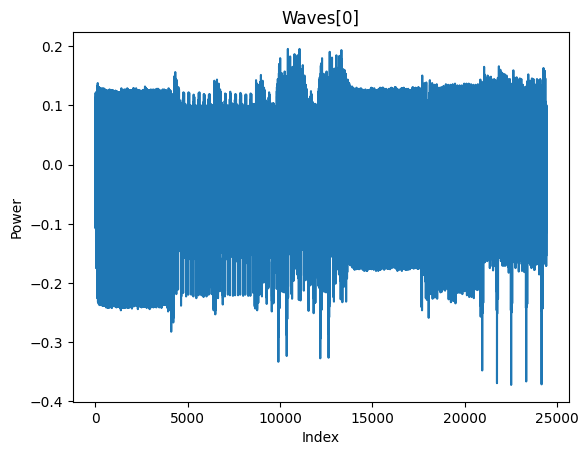

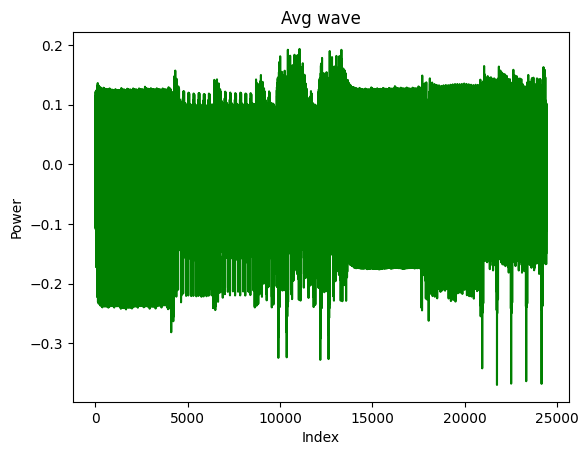

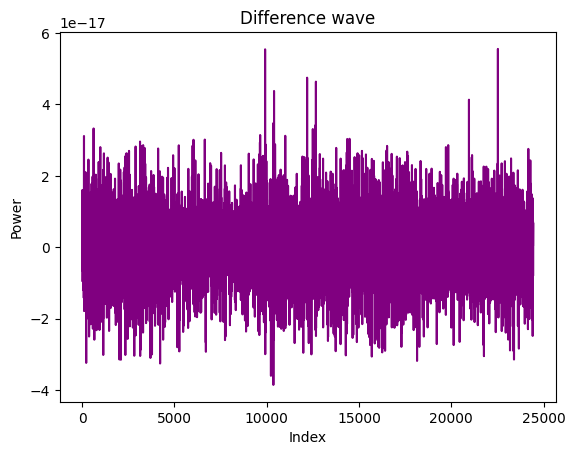

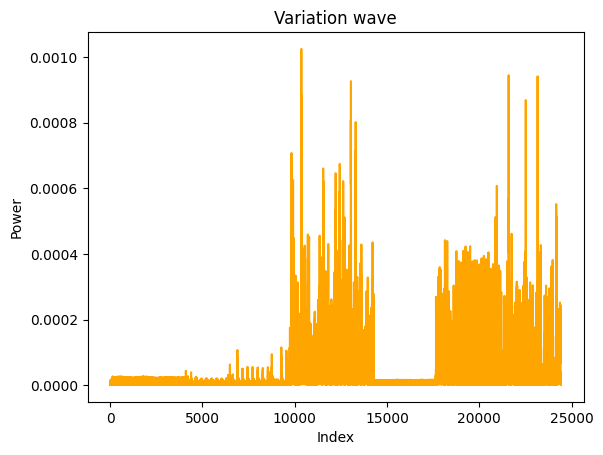

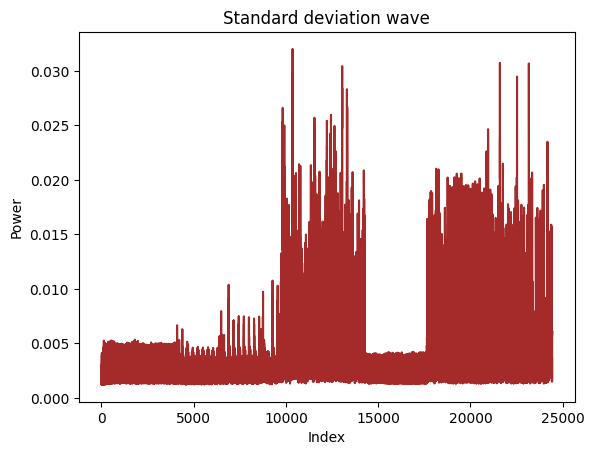

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

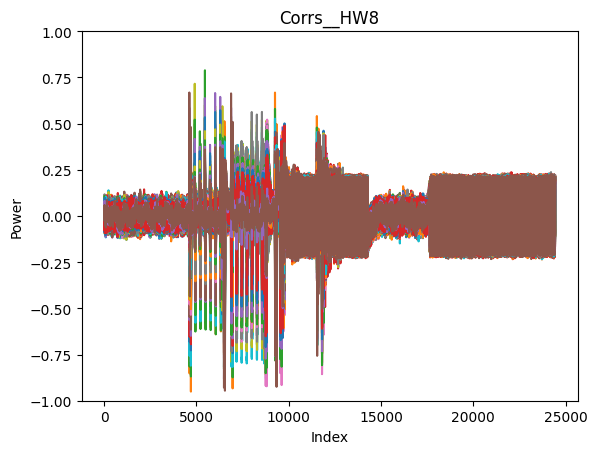

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

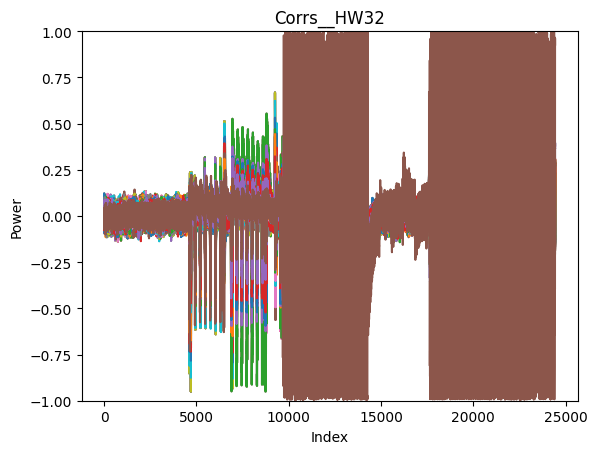

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

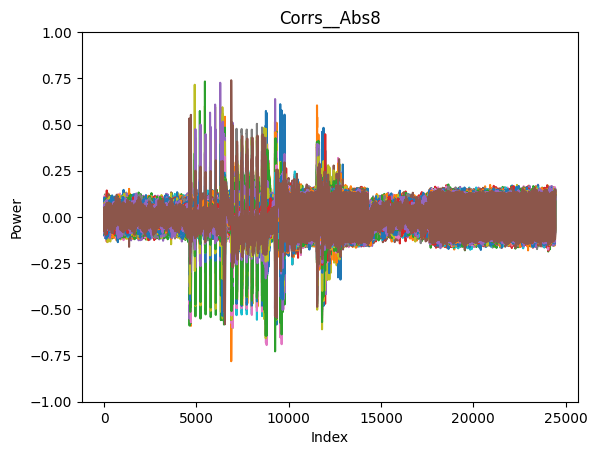

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

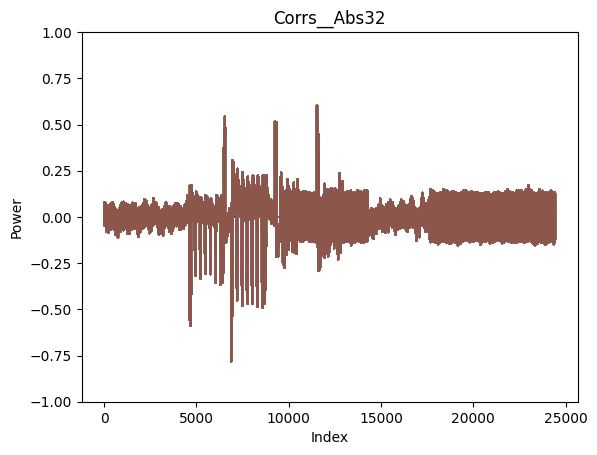

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [4]:
corr_HW8, corr_HW32, corr_Abs8, corr_Abs32, rand_inputs, waves, out, diff_avg, avg_wave, var = capture_correlate(scope=scope,
                                                                                                                      epochs_list = epochs_list,
                                                                                                                      decimate = decimate,
                                                                                                                      reverse = reverse,
                                                                                                                      runName=firmwareName)

### SPA

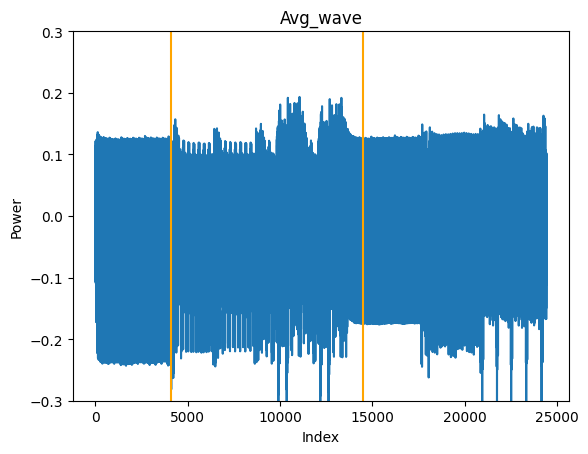

In [5]:
activity_borders = [4100, 14500]
avg_wave = np.array(avg_wave)
image = plot_mult(avg_wave, _type = f"avg_wave_{firmwareName}", mult=False, ylim=[-0.3,0.3], graph_title="Avg_wave", ylabel="Power", borders = activity_borders)

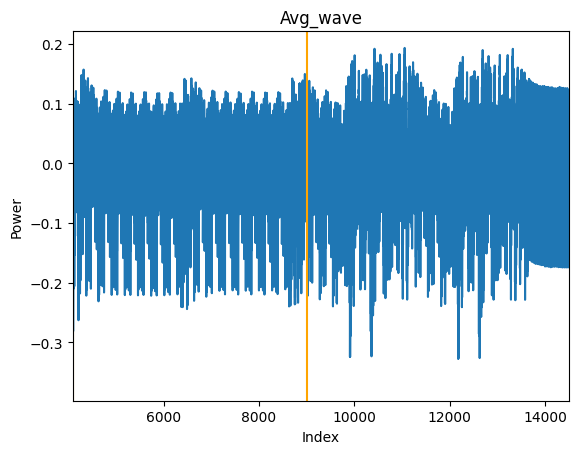

In [7]:
#prev_borders = next_borders
layer_borders = [4100, 9000]
avg_wave = np.array(avg_wave)
image = plot_mult(avg_wave, _type = "ANN_Active", mult=False, xlim=[activity_borders[0],activity_borders[1]], graph_title="Avg_wave",
                  ylabel="Power", borders = layer_borders)

#### SPA of neuron's 1. layer

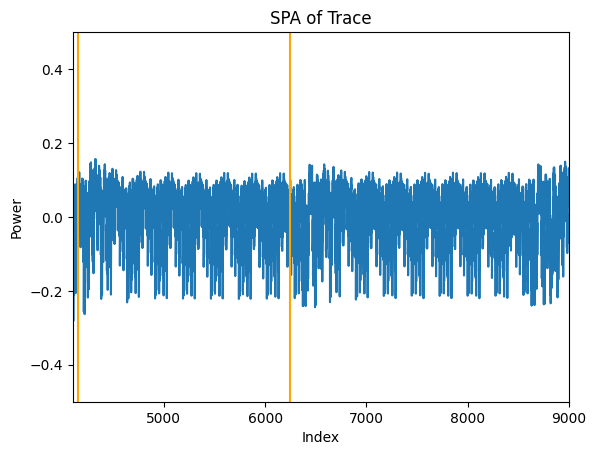

In [9]:
#prev_borders = next_borders
neuron_borders = [4150, 6250]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1", mult=False, xlim=[layer_borders[0],layer_borders[1]], ylim=[-0.5,0.5], graph_title="SPA of Trace",
          ylabel="Power", borders = neuron_borders)
offset = neuron_borders[1] - neuron_borders[0]

##### SPA of neuron's 1. layer, 1. neuron

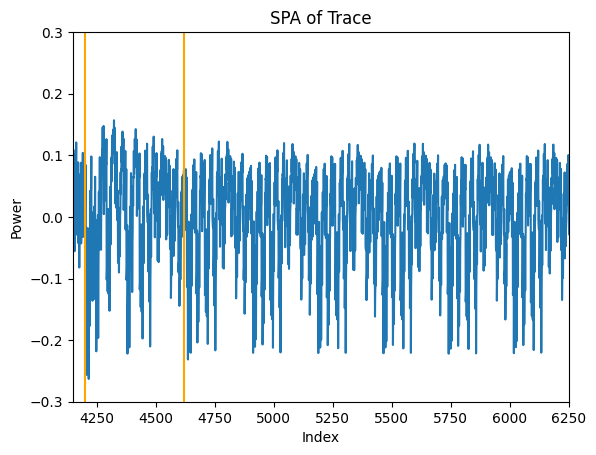

In [10]:
#prev_borders = next_borders
mult_borders = [4200, 4620]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1_Neuron_1th", mult=False, xlim=[neuron_borders[0],neuron_borders[1]], ylim=[-0.3,0.3], graph_title="SPA of Trace",
          ylabel="Power", borders = mult_borders)

###### SPA of neuron's 1. layer, 1. neuron, 1. multiplication

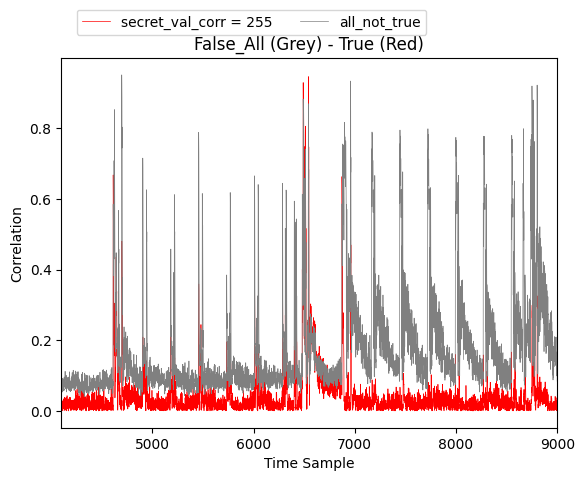

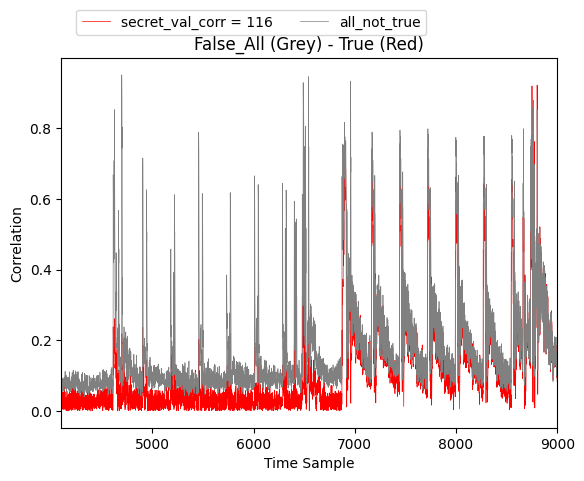

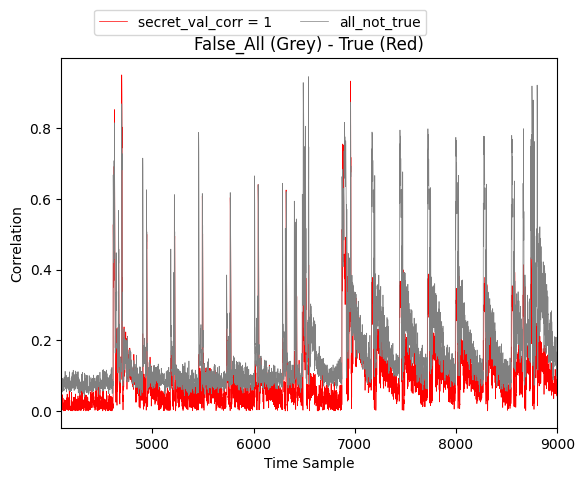

In [18]:
corr_map = abs(np.array(corr_HW8))
compTrueToAll_corrMatrix(corr_map, true_secret = 255, xlim=[4100, 9000], true_last = False, saveName = f'CPA_mult_level_secret[{255}]')
compTrueToAll_corrMatrix(corr_map, true_secret = 116, xlim=[4100, 9000], true_last = False, saveName = f'CPA_mult_level_secret[{116}]')
compTrueToAll_corrMatrix(corr_map, true_secret = 1, xlim=[4100, 9000], true_last = False, saveName = f'CPA_mult_level_secret[{1}]')

[255  77  76  52  20 228 240   0 116 115 205  58  51 240 254   0  77 210
  37  85]


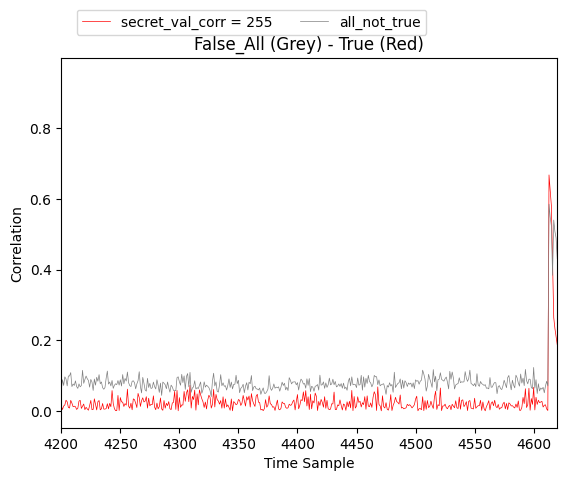

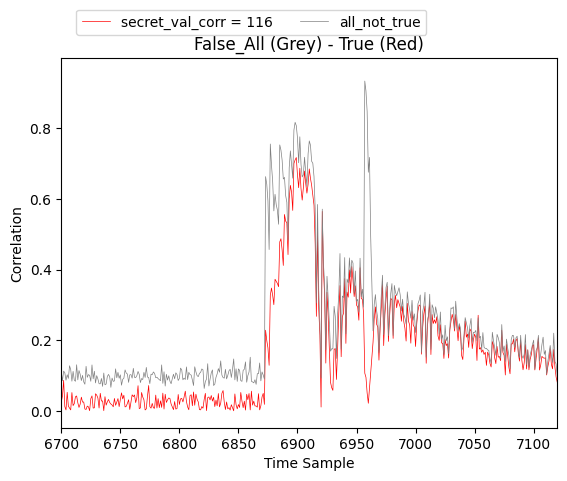

In [17]:
#prev_borders = next_borders
secrets = np.array(out)[3:-4]
print(secrets)
corr_map = abs(np.array(corr_HW8))
akt_borders = np.array(mult_borders) + 0

compTrueToAll_corrMatrix(corr_map, true_secret = 255, xlim=[akt_borders[0],akt_borders[1]], true_last = False, saveName = f'CPA_mult_level_secret[{255}]')
akt_borders = akt_borders + offset+400
compTrueToAll_corrMatrix(corr_map, true_secret = 116, xlim=[akt_borders[0],akt_borders[1]], true_last = False, saveName = f'CPA_mult_level_secret[{116}]')

### CPA

##### CPA, weight extraction - Abs8

Hello 255
Peak range: 0.3
24429
 Index of global max: 6881 and global_max_val: 0.7808517210244851


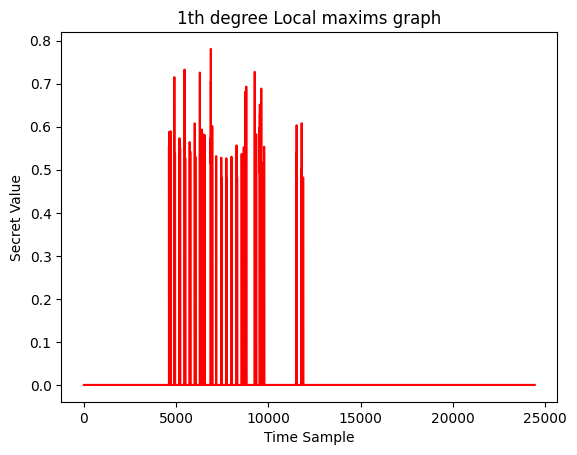

Number of uniques: 25
Number of local maxims: 191
Uniquess: [1, 2, 192, 128, 224, 240, 248, 252, 255, 16, 58, 116, 208, 8, 29, 160, 54, 155, 232, 64, 136, 244, 6, 250, 140]
Local maxims: [1, 1, 2, 2, 2, 2, 192, 192, 1, 1, 1, 1, 128, 128, 128, 2, 2, 2, 192, 192, 2, 2, 2, 192, 192, 192, 192, 192, 192, 192, 224, 2, 2, 224, 224, 224, 2, 2, 224, 224, 224, 224, 2, 2, 2, 128, 128, 128, 240, 248, 248, 192, 252, 252, 252, 248, 240, 248, 248, 255, 255, 1, 2, 16, 16, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 58, 58, 58, 58, 116, 208, 8, 8, 8, 8, 29, 29, 29, 29, 29, 29, 29, 29, 29, 116, 1, 29, 29, 29, 58, 116, 116, 29, 116, 29, 116, 58, 29, 29, 29, 29, 58, 1, 58, 29, 29, 29, 116, 58, 1, 58, 58, 160, 58, 208, 208, 208, 208, 208, 208, 208, 116, 116, 116, 116, 116, 116, 116, 116, 116, 255, 255, 252, 252, 252, 252, 54, 155, 155, 54, 54, 240, 240, 240, 116, 116, 232, 64, 64, 64, 116, 116, 116, 116, 116, 116, 116, 64, 136, 136, 116, 116, 116, 232, 244, 232, 6, 250, 1, 1, 1, 1, 1, 248, 208, 208, 208, 116, 116, 140,

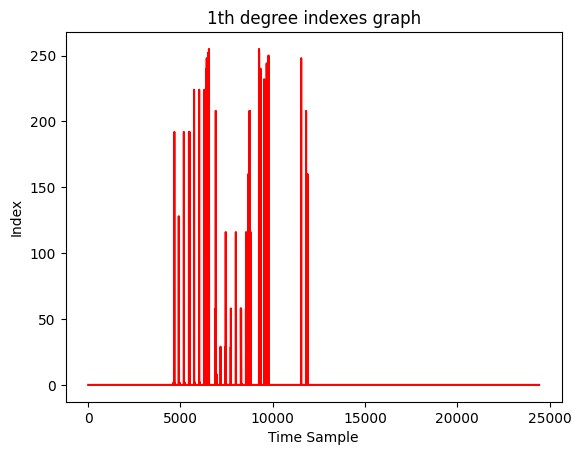

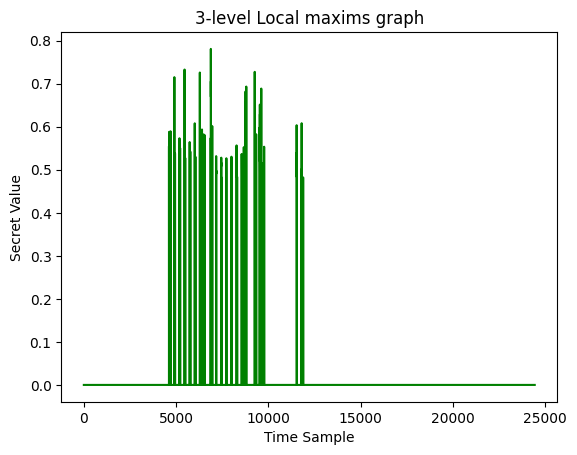

Number of uniques: 25
Number of local maxims: 235
Uniquess: [1, 2, 192, 128, 224, 240, 248, 252, 255, 16, 58, 116, 208, 8, 29, 160, 232, 54, 155, 64, 136, 244, 6, 250, 140]
Local maxims: [1, 1, 2, 2, 2, 2, 192, 192, 1, 1, 1, 1, 128, 128, 128, 2, 2, 2, 192, 192, 192, 2, 2, 2, 192, 192, 192, 192, 192, 192, 192, 224, 224, 2, 2, 224, 224, 224, 2, 2, 224, 224, 224, 224, 2, 2, 2, 128, 128, 128, 240, 2, 248, 248, 192, 240, 252, 252, 252, 240, 248, 240, 248, 248, 255, 255, 255, 1, 2, 16, 16, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 58, 58, 58, 58, 58, 58, 58, 116, 208, 8, 8, 8, 8, 8, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 116, 1, 29, 29, 29, 29, 29, 58, 116, 29, 116, 29, 116, 29, 29, 116, 58, 29, 29, 29, 29, 116, 29, 58, 1, 58, 58, 29, 29, 29, 29, 29, 116, 58, 1, 58, 58, 58, 160, 58, 208, 208, 208, 208, 208, 208, 232, 208, 208, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 255, 255, 252, 252, 252, 252, 252, 54, 155, 54, 155, 155, 155, 54, 54, 240, 240, 240, 116, 116,

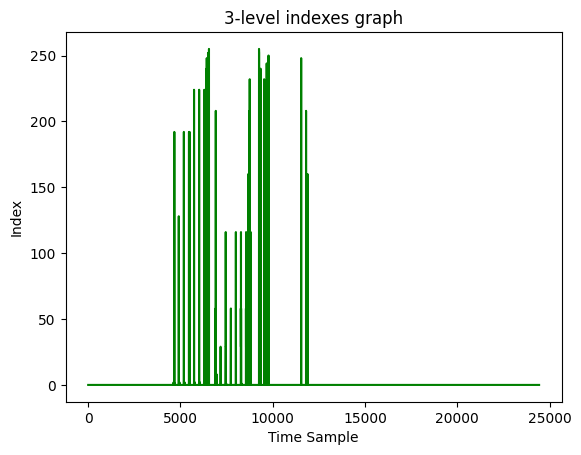

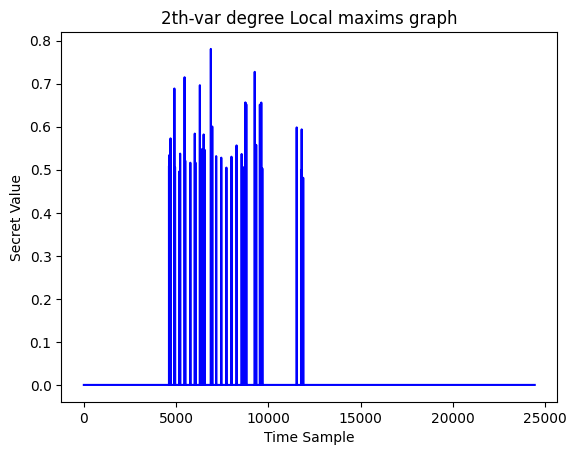

Number of uniques: 18
Number of local maxims: 44
Uniquess: [1, 2, 192, 128, 224, 248, 252, 255, 58, 208, 8, 29, 116, 155, 240, 136, 244, 160]
Local maxims: [1, 2, 192, 1, 128, 2, 192, 2, 192, 192, 2, 224, 2, 224, 2, 128, 248, 252, 255, 1, 58, 208, 8, 29, 29, 29, 116, 29, 29, 58, 208, 116, 116, 252, 155, 240, 116, 136, 116, 244, 1, 208, 116, 160]


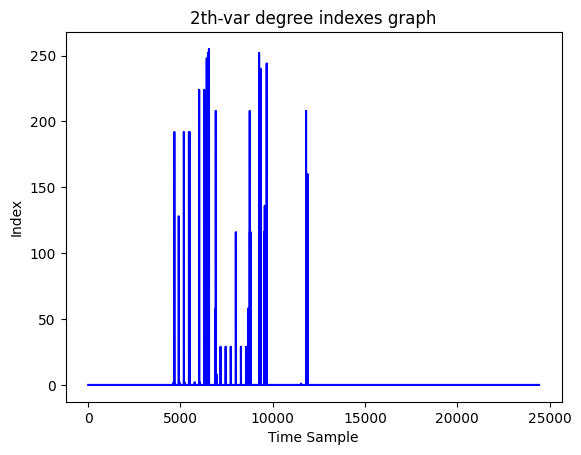

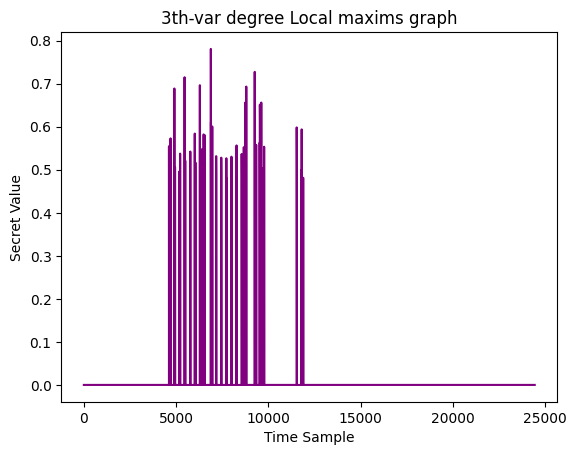

Number of uniques: 23
Number of local maxims: 132
Uniquess: [1, 2, 192, 128, 224, 240, 248, 252, 255, 16, 58, 208, 8, 29, 116, 160, 155, 54, 64, 136, 244, 232, 250]
Local maxims: [1, 1, 2, 2, 2, 192, 1, 1, 1, 128, 128, 2, 2, 192, 2, 2, 192, 192, 192, 192, 192, 2, 2, 224, 224, 2, 224, 224, 224, 2, 2, 128, 240, 248, 252, 252, 252, 248, 240, 248, 255, 255, 16, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 58, 58, 208, 8, 8, 8, 29, 29, 29, 29, 29, 29, 29, 116, 29, 29, 29, 58, 116, 29, 29, 116, 29, 29, 29, 29, 58, 29, 29, 29, 116, 58, 58, 58, 160, 208, 208, 208, 208, 208, 116, 116, 116, 116, 116, 116, 116, 252, 252, 252, 155, 155, 54, 240, 240, 116, 64, 64, 116, 116, 116, 116, 116, 116, 136, 136, 116, 116, 244, 232, 250, 1, 1, 1, 248, 208, 208, 116, 160]


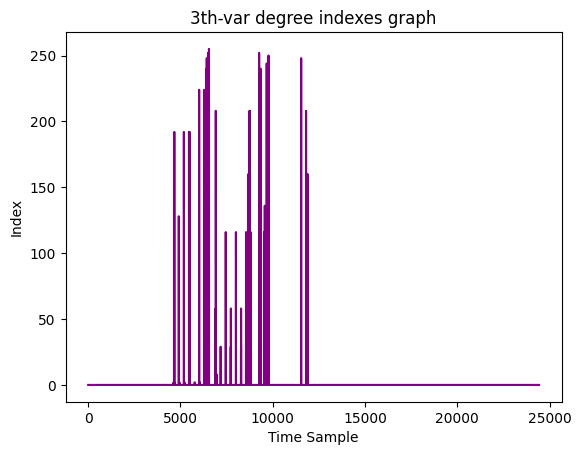

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4614, with correlation secret_corr = 0.509


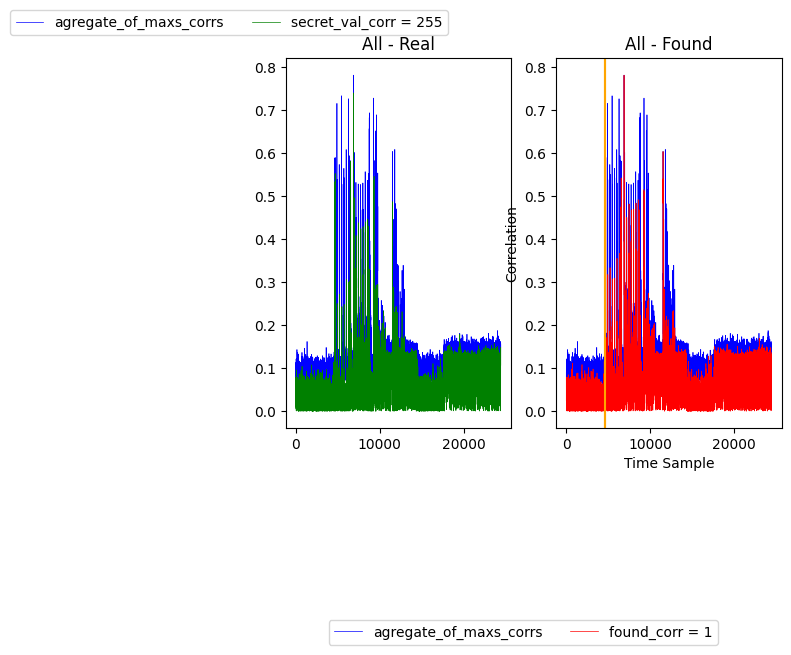

Hello 77
In range 4620 - 24429
 Found the soonest secret value is 2, at the time sample 4626, with correlation secret_corr = 0.534


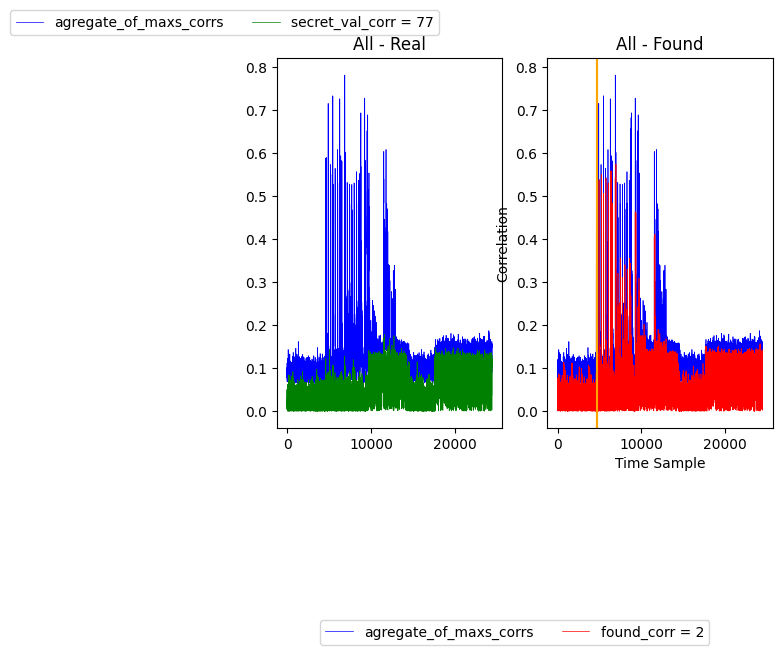

Hello 76
In range 4646 - 24429
 Found the soonest secret value is 192, at the time sample 4666, with correlation secret_corr = 0.491


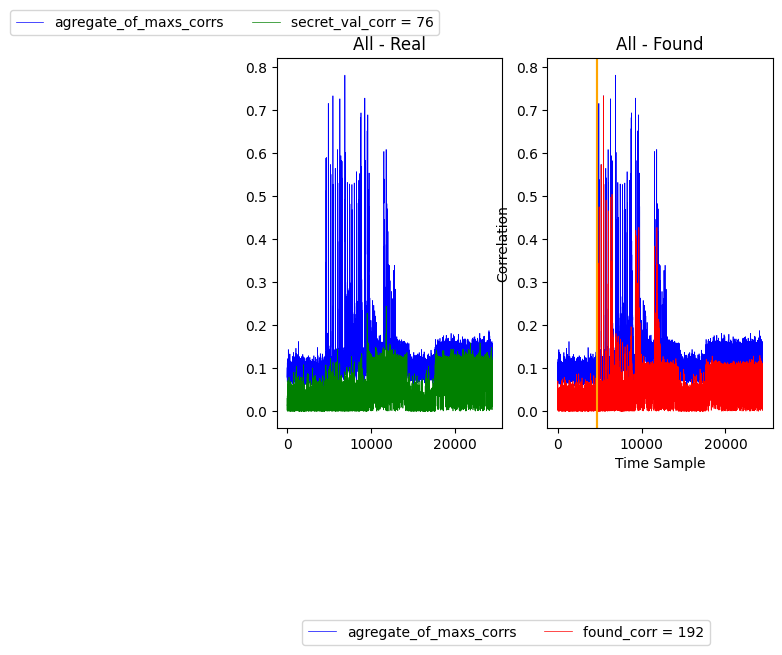

Hello 52
In range 4682 - 24429
 Found the soonest secret value is 1, at the time sample 4698, with correlation secret_corr = 0.573


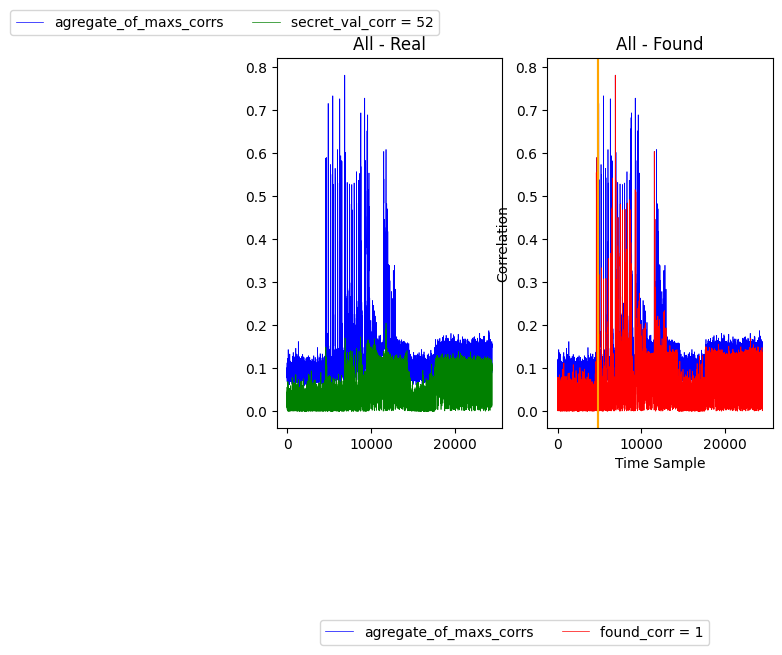

Hello 20
In range 4802 - 24429
 Found the soonest secret value is 128, at the time sample 4906, with correlation secret_corr = 0.689


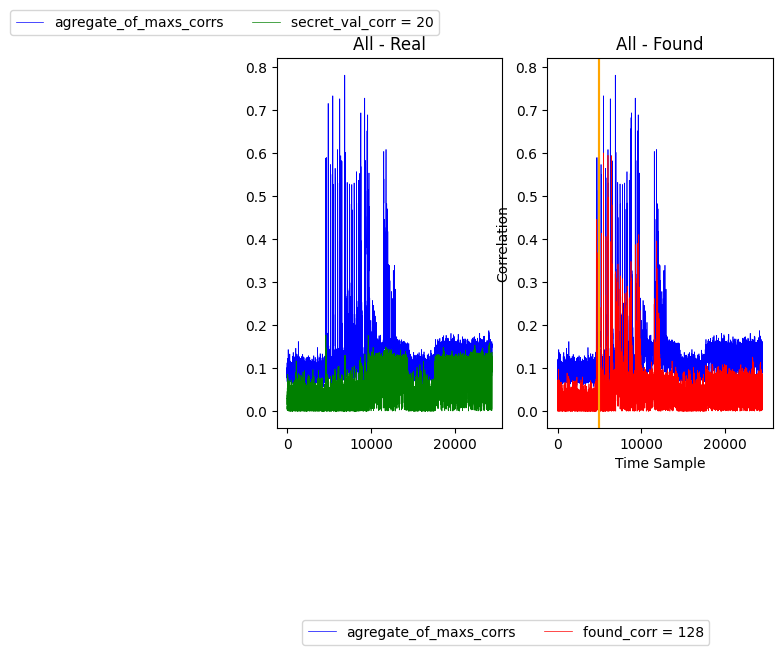

Hello 228
In range 4924 - 24429
 Found the soonest secret value is 2, at the time sample 4942, with correlation secret_corr = 0.506


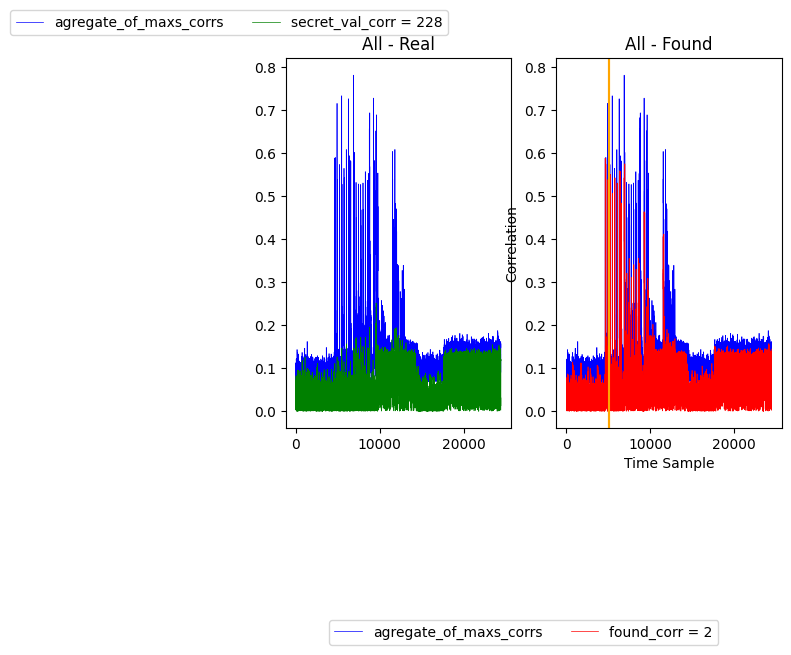

Hello 240
In range 5063 - 24429
 Found the soonest secret value is 192, at the time sample 5183, with correlation secret_corr = 0.497


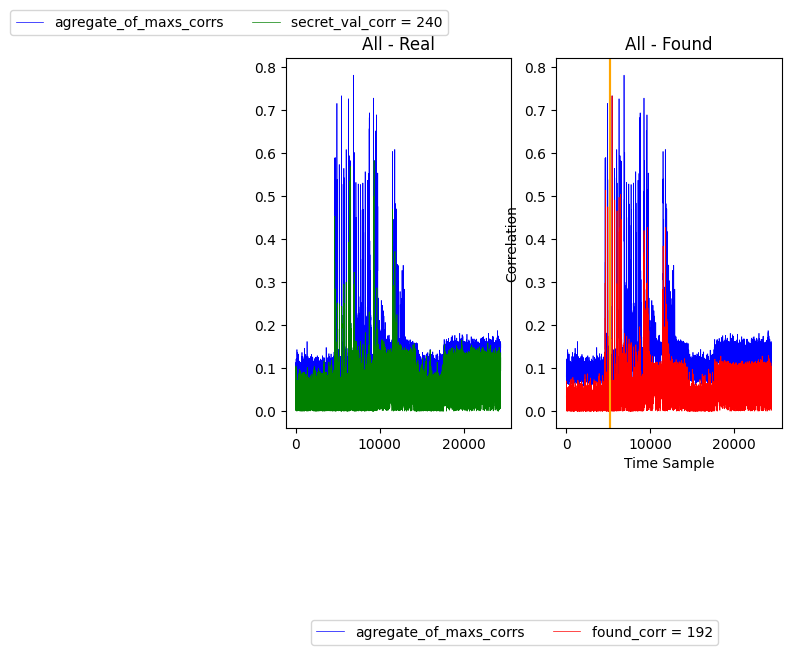

Hello 0
In range 5200 - 24429
 Found the soonest secret value is 2, at the time sample 5218, with correlation secret_corr = 0.538


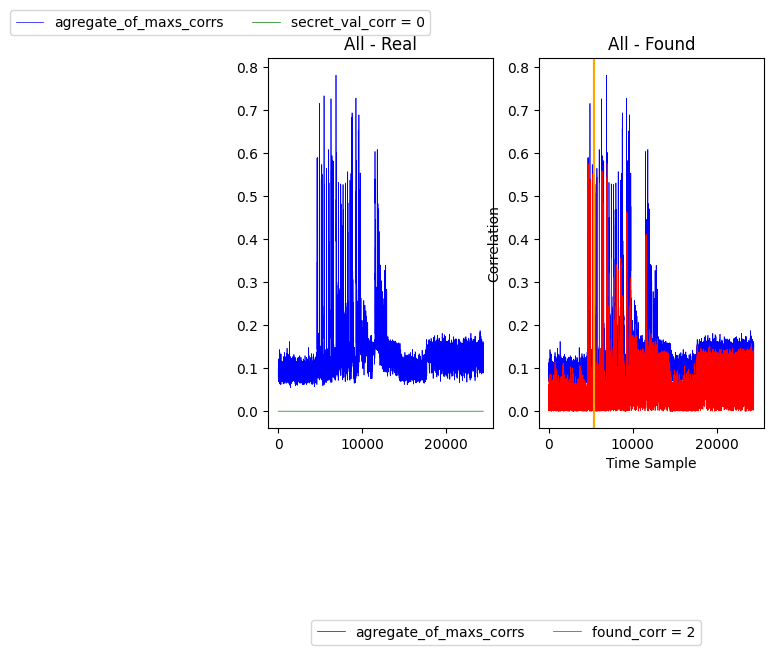

Hello 116
In range 5338 - 24429
 Found the soonest secret value is 192, at the time sample 5458, with correlation secret_corr = 0.715


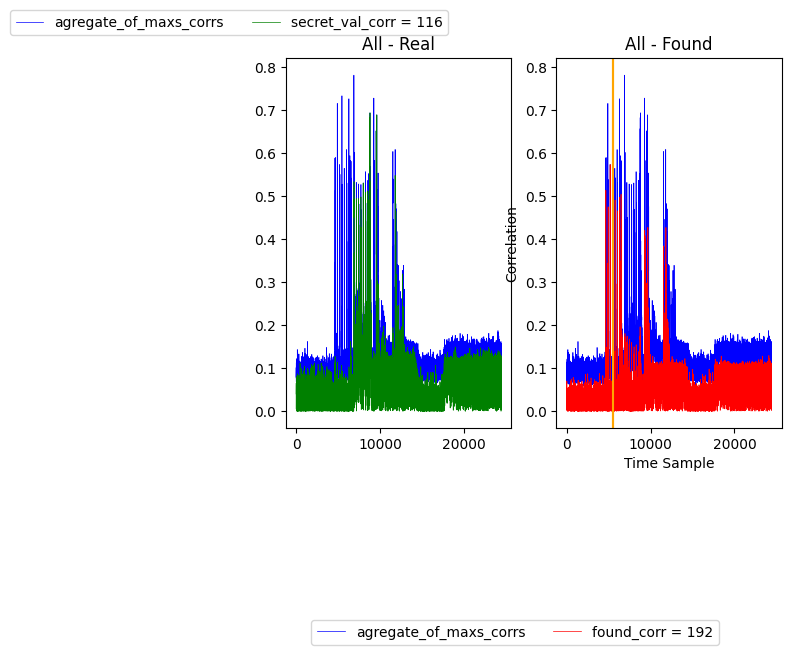

Hello 115
In range 5476 - 24429
 Found the soonest secret value is 192, at the time sample 5494, with correlation secret_corr = 0.521


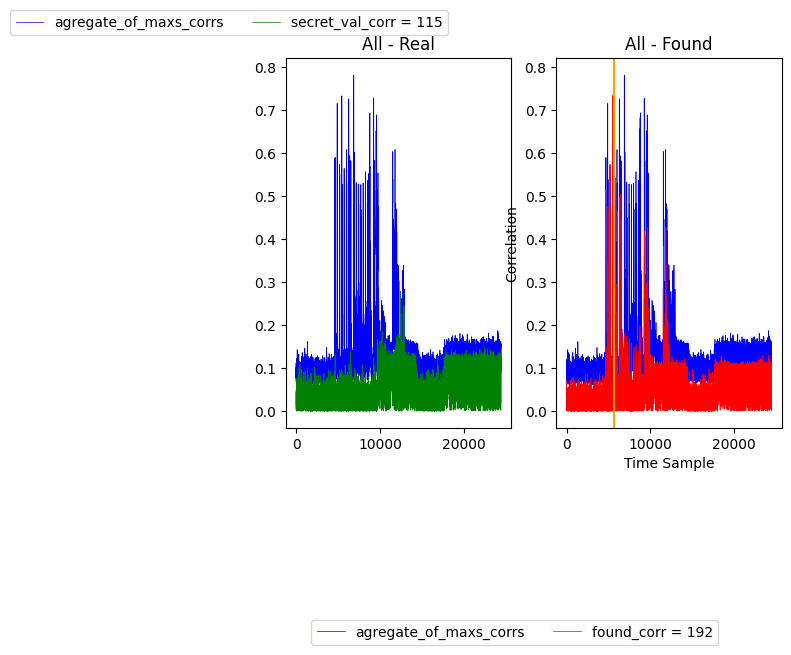

Hello 205
In range 5632 - 24429
 Found the soonest secret value is 2, at the time sample 5770, with correlation secret_corr = 0.516


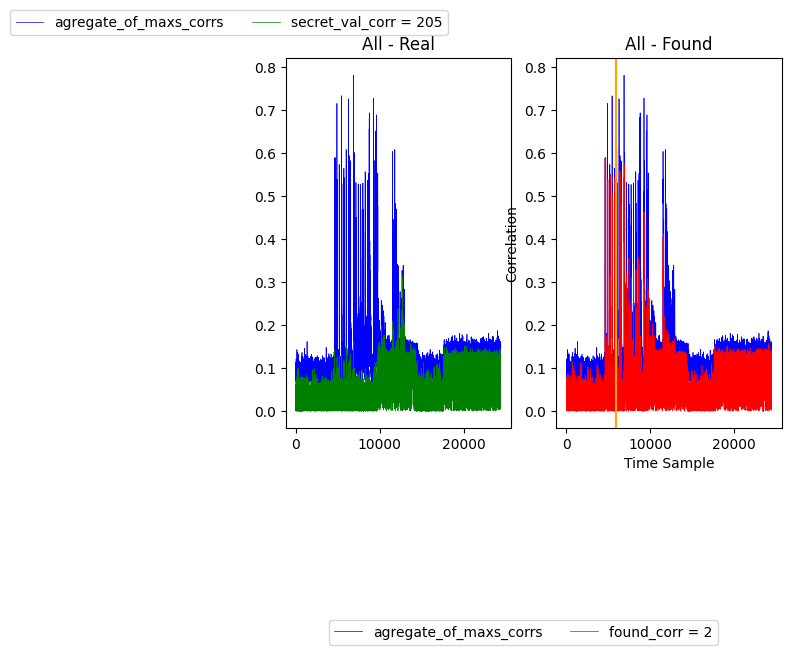

Hello 58
In range 5890 - 24429
 Found the soonest secret value is 224, at the time sample 6010, with correlation secret_corr = 0.584


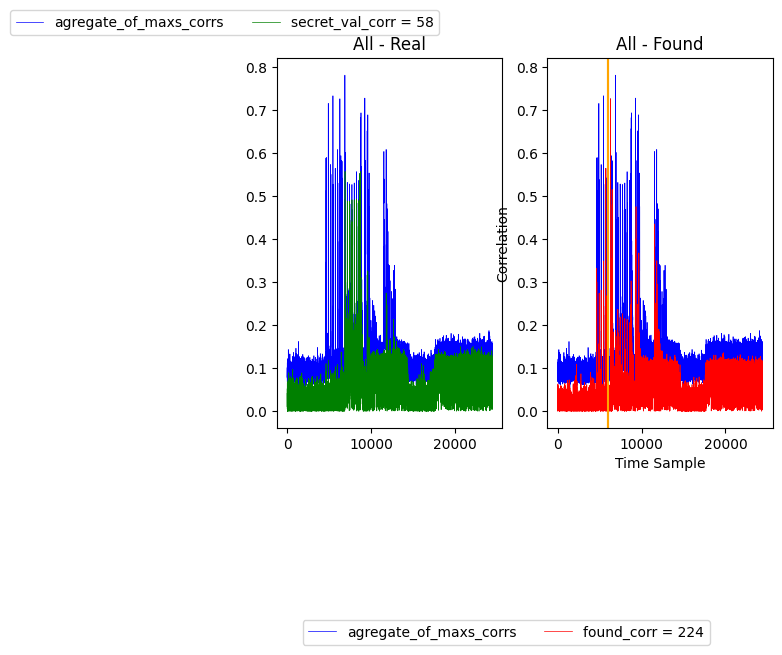

In [19]:
corr_map = abs(np.array(corr_Abs8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs8_{firmwareName}')

##### CPA, weight extraction - Abs32

Hello 255
Peak range: 0.3
24429
 Index of global max: 6881 and global_max_val: 0.7808517210244853


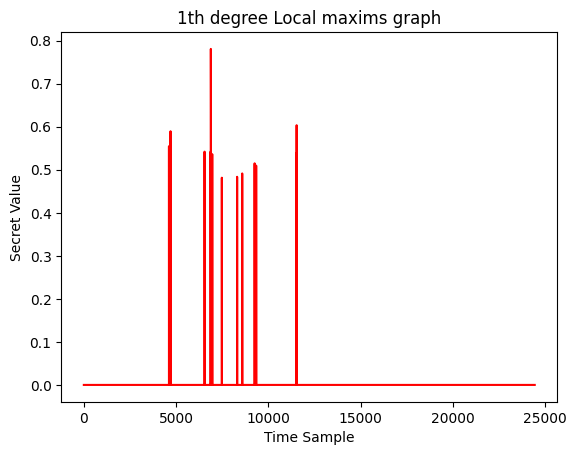

Number of uniques: 18
Number of local maxims: 34
Uniquess: [41, 87, 81, 75, 91, 3, 37, 1, 77, 5, 21, 7, 107, 111, 123, 93, 63, 115]
Local maxims: [41, 87, 81, 75, 91, 3, 37, 1, 77, 1, 5, 21, 7, 107, 1, 111, 5, 111, 123, 93, 5, 37, 41, 7, 63, 87, 115, 111, 3, 41, 1, 1, 5, 5]


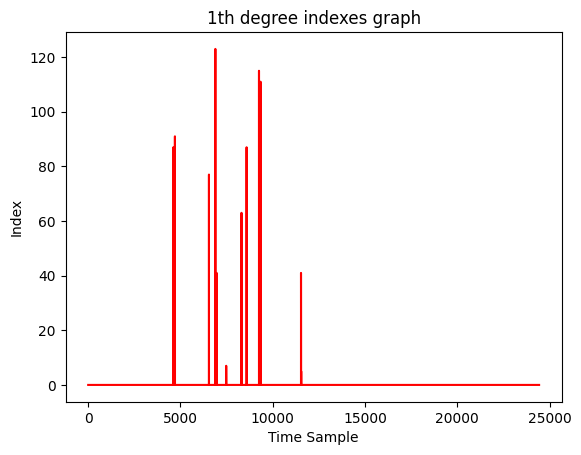

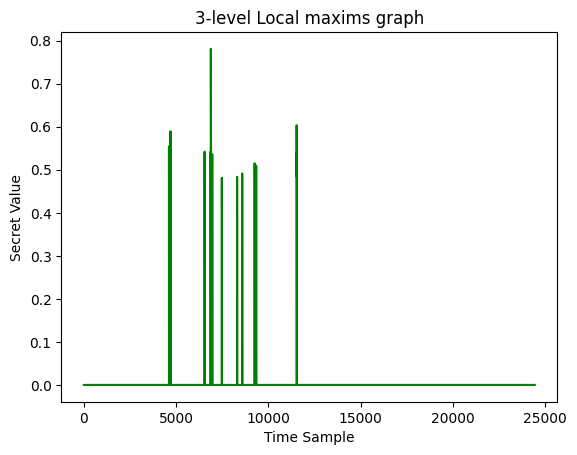

Number of uniques: 21
Number of local maxims: 39
Uniquess: [41, 87, 81, 75, 91, 3, 37, 1, 77, 5, 21, 7, 107, 61, 111, 69, 123, 93, 63, 115, 163]
Local maxims: [41, 87, 81, 75, 91, 3, 37, 1, 77, 1, 5, 21, 7, 107, 1, 61, 111, 5, 111, 69, 123, 93, 5, 37, 41, 7, 63, 87, 115, 111, 3, 41, 1, 1, 1, 163, 5, 5, 5]


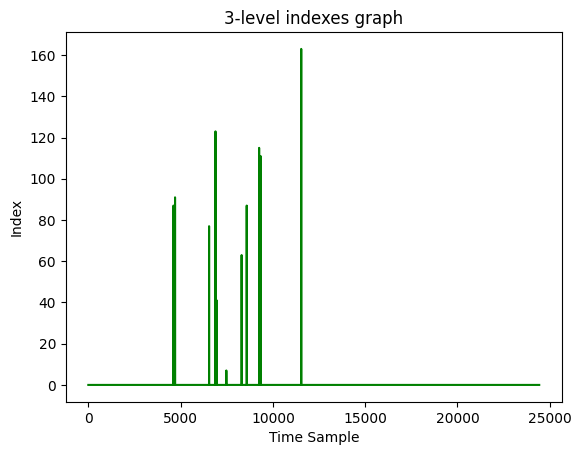

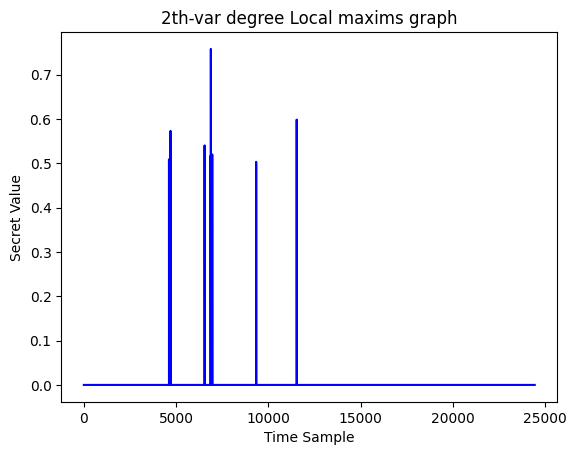

Number of uniques: 8
Number of local maxims: 8
Uniquess: [87, 91, 77, 21, 107, 41, 3, 1]
Local maxims: [87, 91, 77, 21, 107, 41, 3, 1]


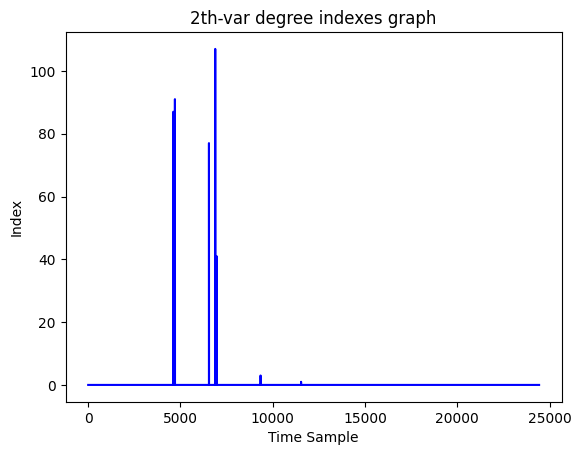

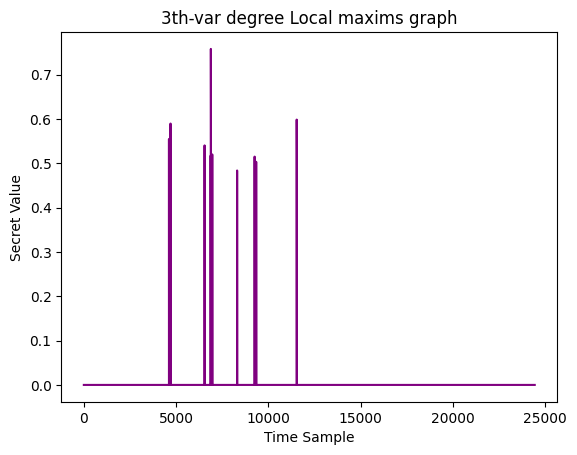

Number of uniques: 16
Number of local maxims: 24
Uniquess: [41, 87, 75, 91, 3, 37, 77, 1, 21, 107, 111, 5, 123, 93, 63, 115]
Local maxims: [41, 87, 75, 91, 3, 37, 77, 1, 21, 107, 1, 111, 5, 111, 123, 93, 5, 41, 63, 115, 3, 1, 5, 5]


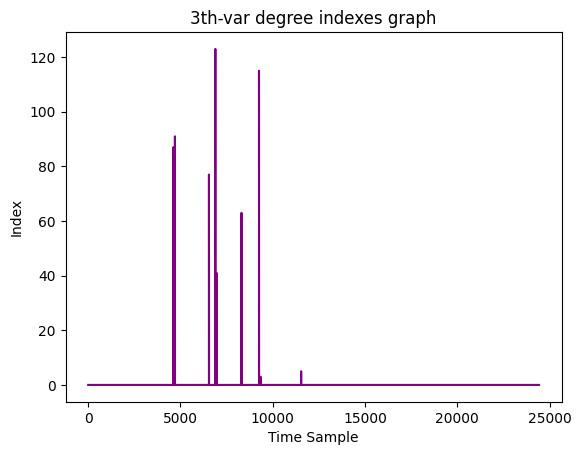

In range 0 - 24429
 Found the soonest secret value is 87, at the time sample 4614, with correlation secret_corr = 0.509


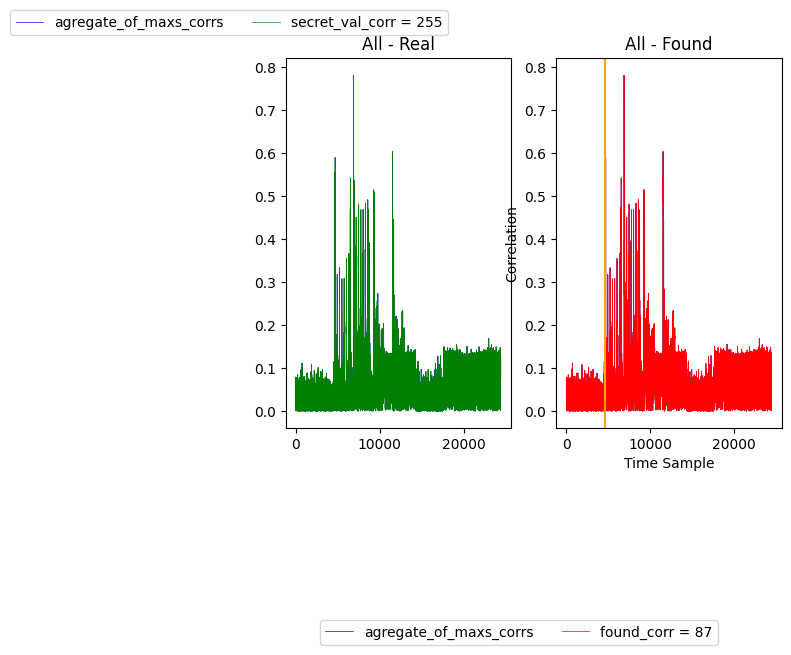

Hello 77
In range 4656 - 24429
 Found the soonest secret value is 91, at the time sample 4698, with correlation secret_corr = 0.573


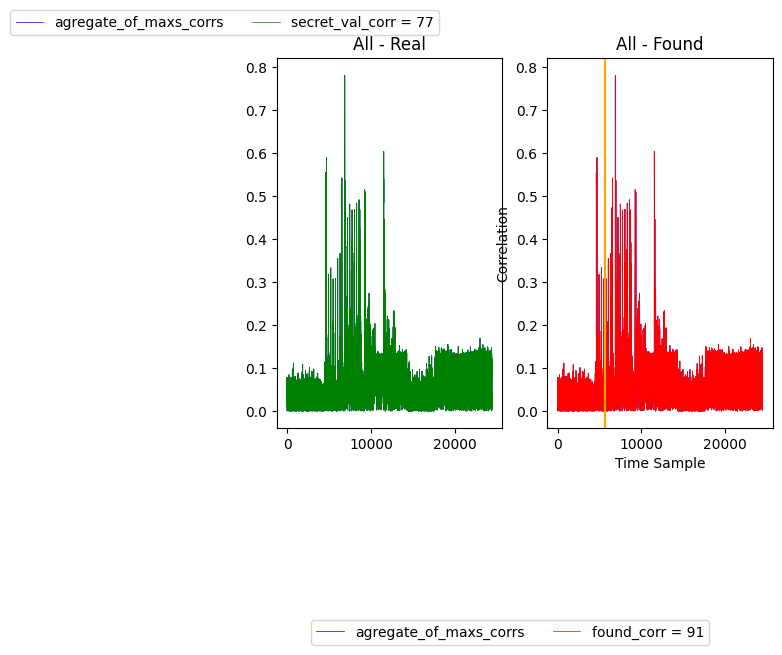

Hello 76
In range 5620 - 24429
 Found the soonest secret value is 77, at the time sample 6542, with correlation secret_corr = 0.540


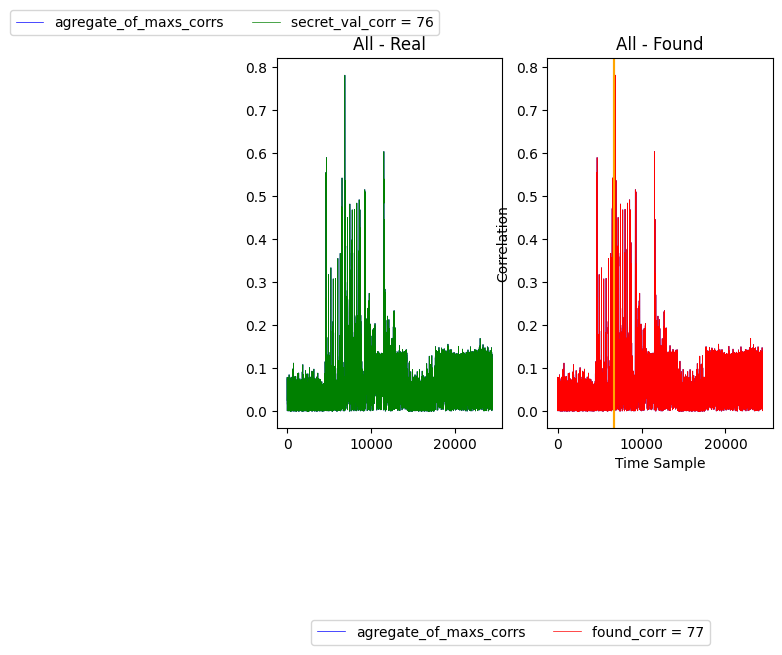

Hello 52
In range 6708 - 24429
 Found the soonest secret value is 21, at the time sample 6874, with correlation secret_corr = 0.517


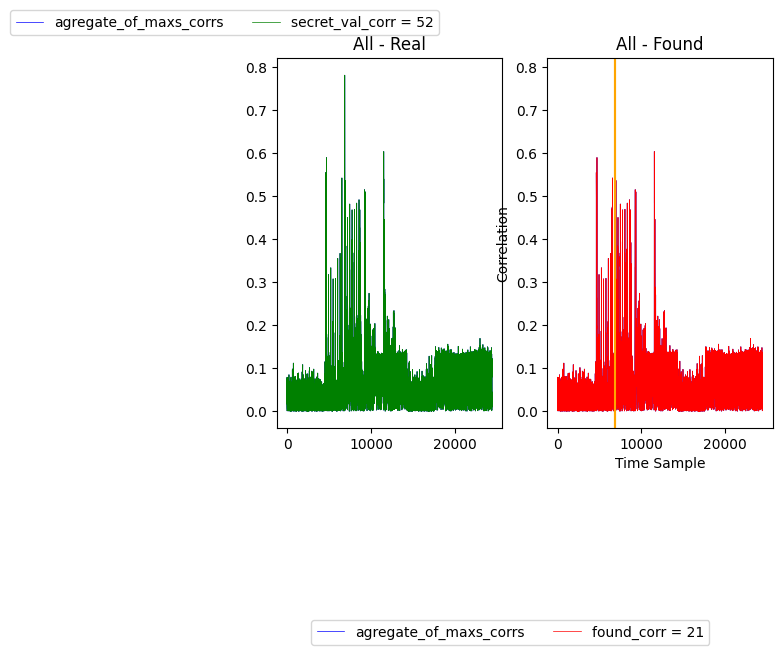

Hello 20
In range 6878 - 24429
 Found the soonest secret value is 107, at the time sample 6882, with correlation secret_corr = 0.758


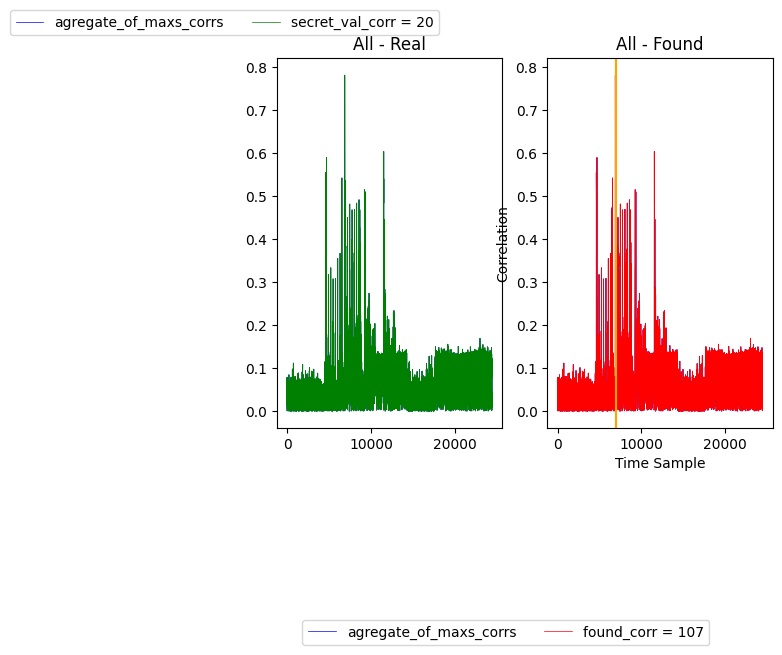

Hello 228
In range 6920 - 24429
 Found the soonest secret value is 41, at the time sample 6958, with correlation secret_corr = 0.520


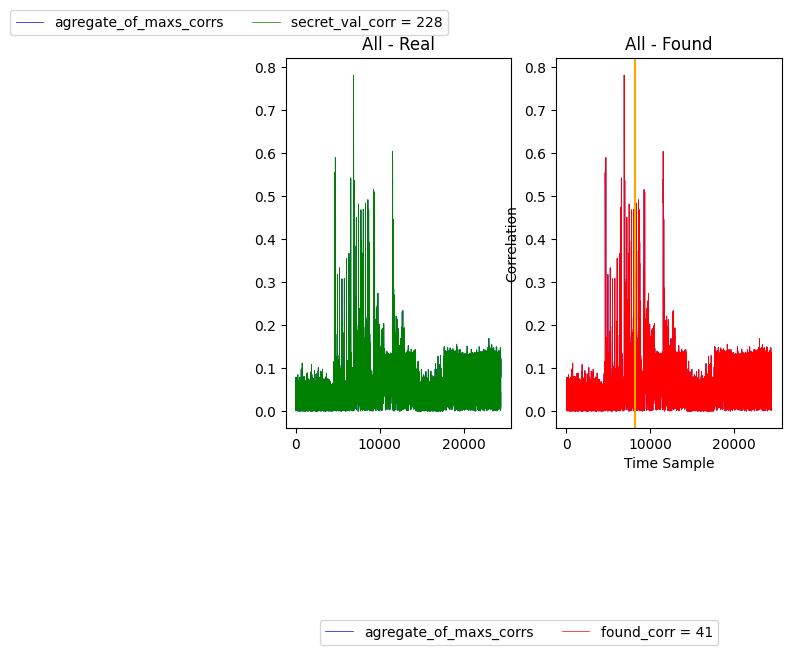

Hello 240
In range 8148 - 24429
 Found the soonest secret value is 3, at the time sample 9338, with correlation secret_corr = 0.503


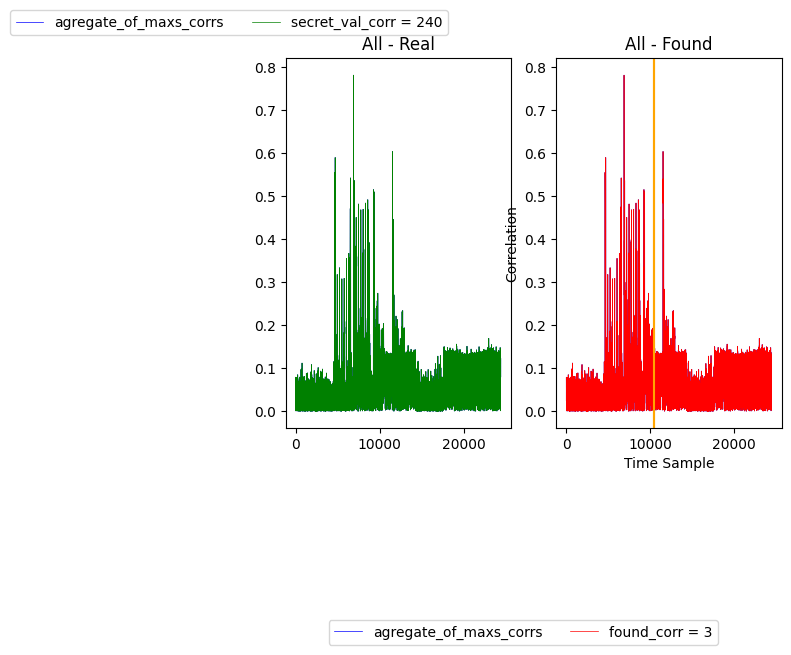

Hello 0
In range 10435 - 24429
 Found the soonest secret value is 1, at the time sample 11532, with correlation secret_corr = 0.598


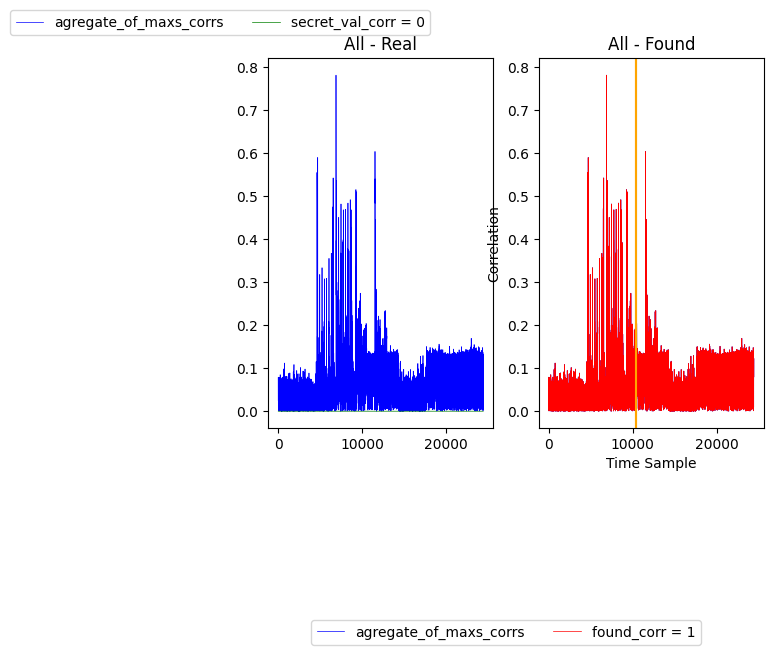

Hello 116
In range 10435 - 24429
 Found the soonest secret value is 1, at the time sample 11532, with correlation secret_corr = 0.598


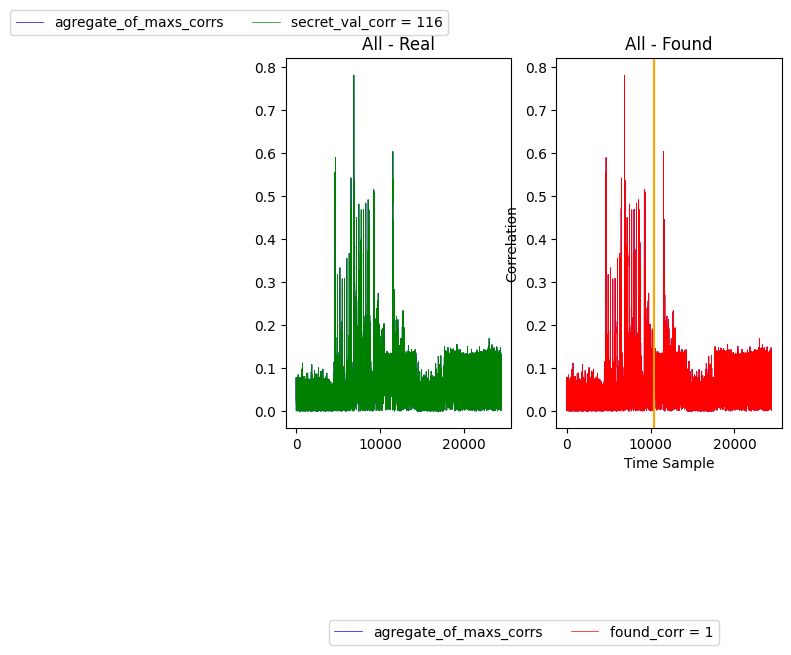

Hello 115
In range 10435 - 24429
 Found the soonest secret value is 1, at the time sample 11532, with correlation secret_corr = 0.598


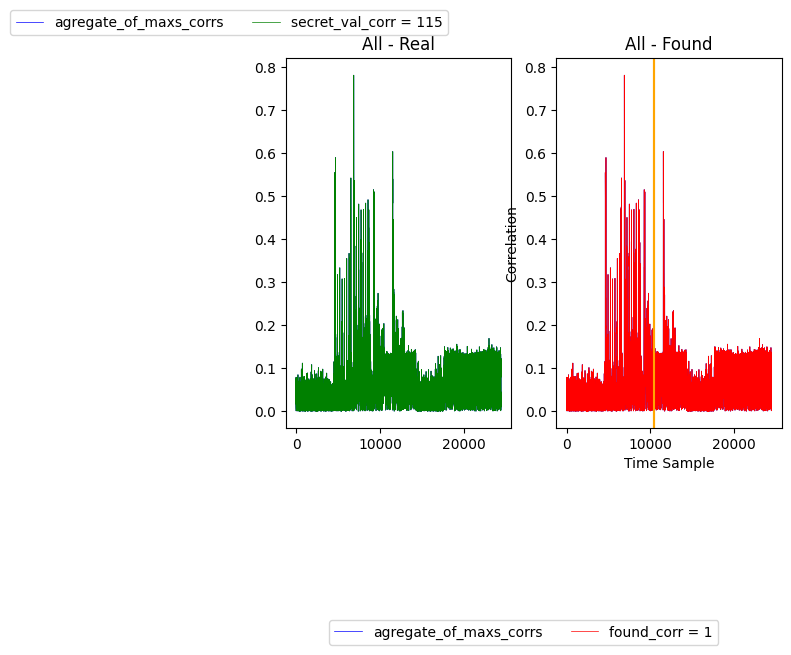

Hello 205
In range 10435 - 24429
 Found the soonest secret value is 1, at the time sample 11532, with correlation secret_corr = 0.598


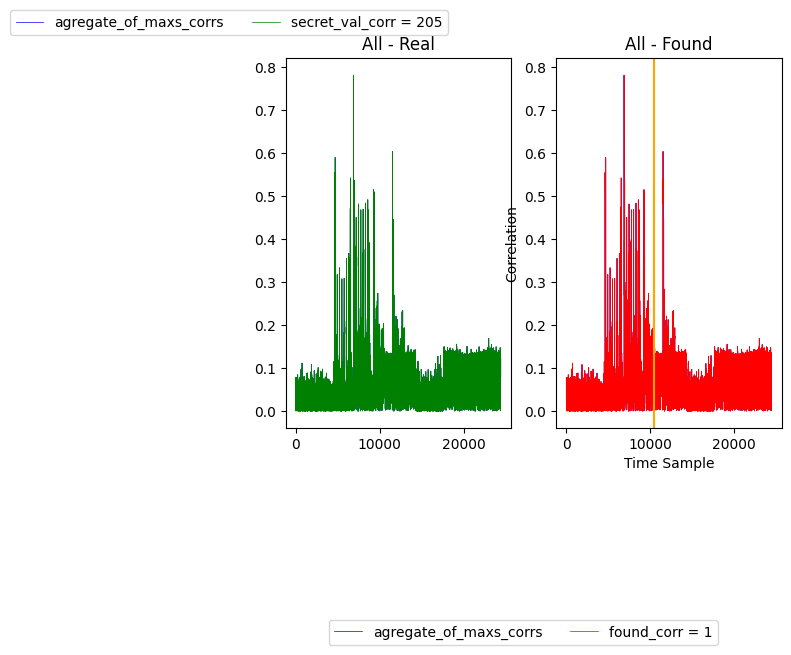

Hello 58
In range 10435 - 24429
 Found the soonest secret value is 1, at the time sample 11532, with correlation secret_corr = 0.598


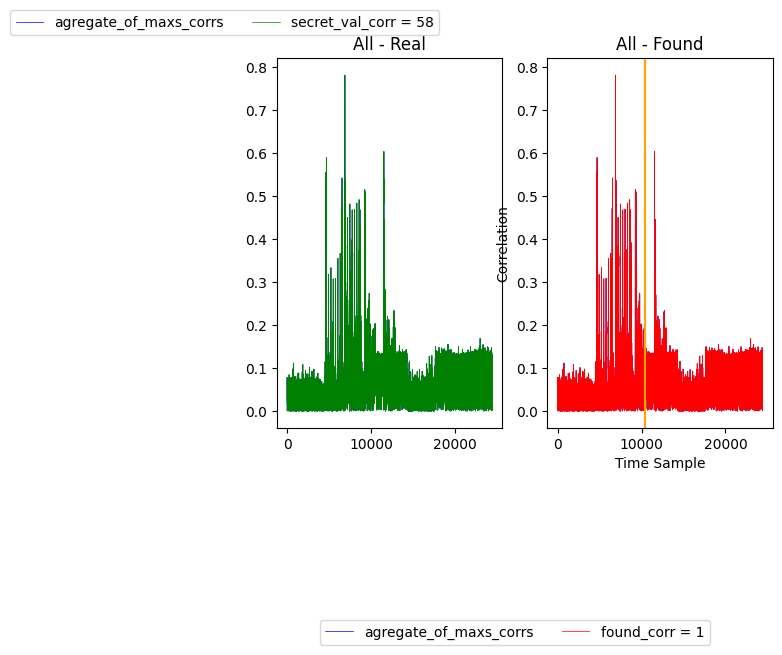

In [20]:
corr_map = abs(np.array(corr_Abs32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs32_{firmwareName}')

##### CPA, weight extraction - HW32

Hello 255
Peak range: 0.3
24429
 Index of global max: 23161 and global_max_val: 0.9984342049471961


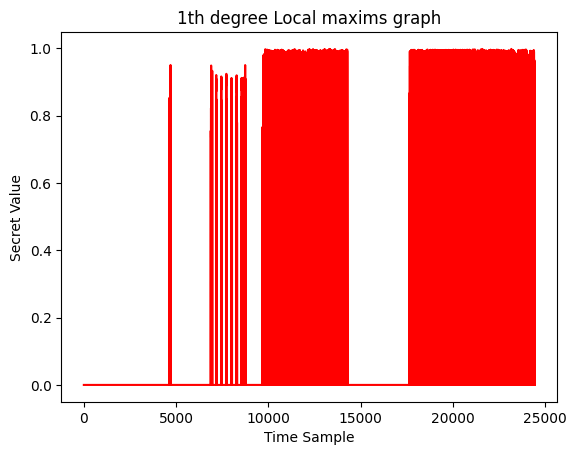

Number of uniques: 3
Number of local maxims: 6023
Uniquess: [1, 255, 29]
Local maxims: [1, 1, 1, 255, 1, 1, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 1, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255

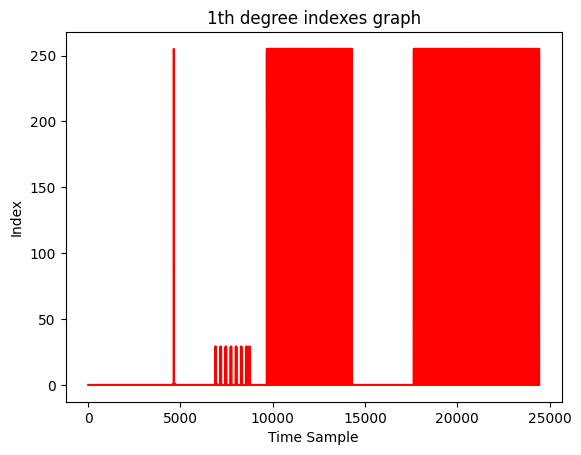

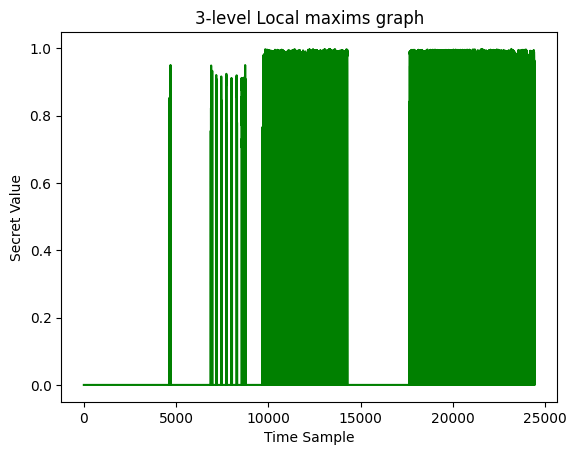

Number of uniques: 3
Number of local maxims: 9013
Uniquess: [1, 255, 29]
Local maxims: [1, 1, 1, 255, 1, 1, 1, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 1, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,

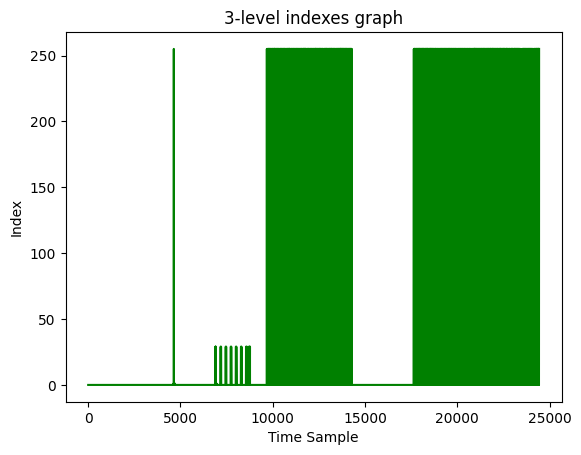

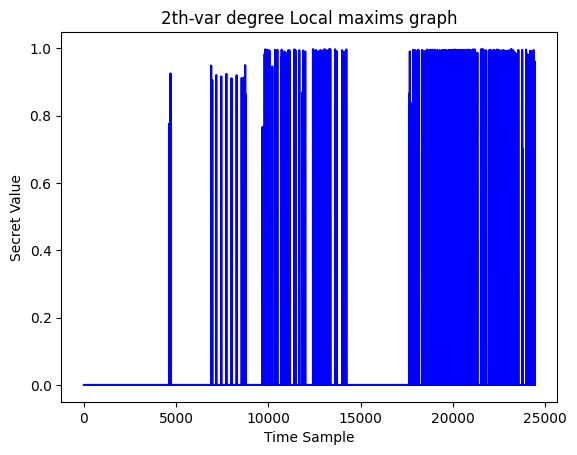

Number of uniques: 3
Number of local maxims: 167
Uniquess: [1, 29, 255]
Local maxims: [1, 1, 29, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]


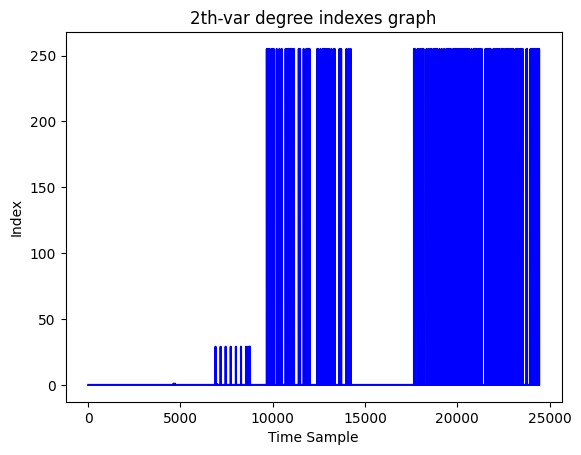

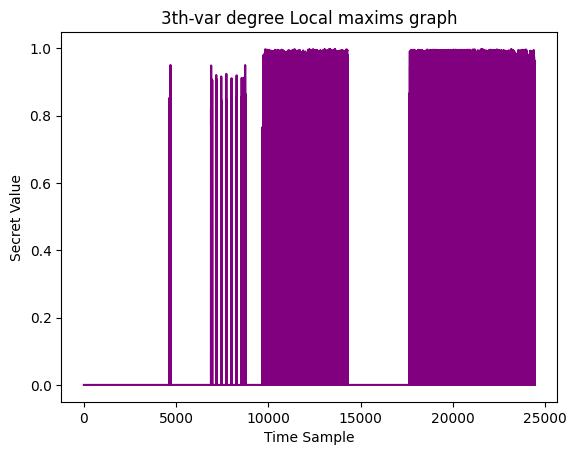

Number of uniques: 3
Number of local maxims: 4096
Uniquess: [1, 29, 255]
Local maxims: [1, 1, 1, 1, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

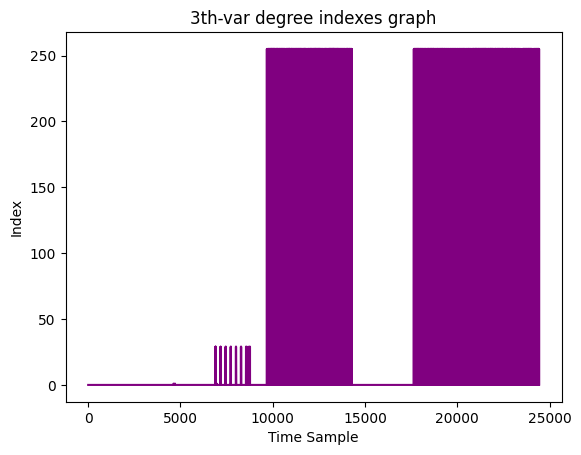

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4626, with correlation secret_corr = 0.776


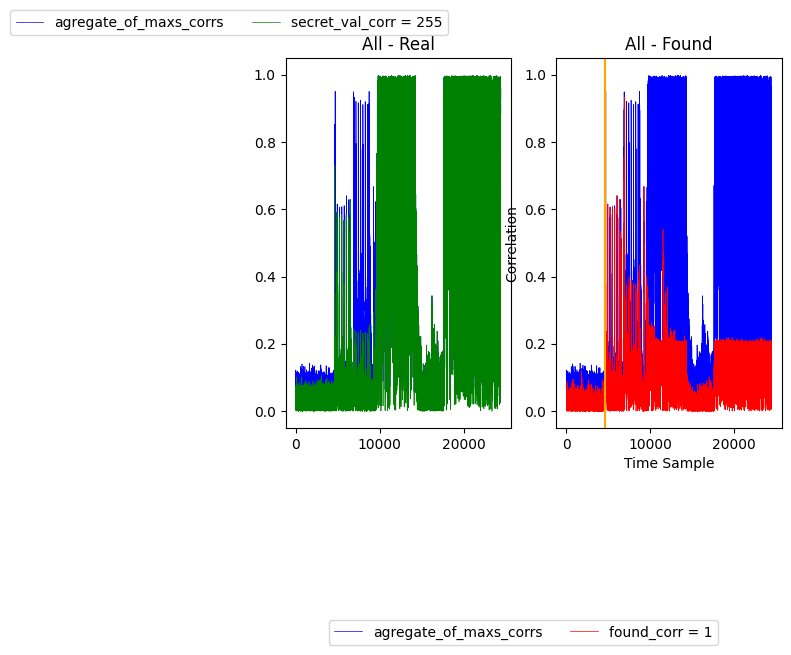

Hello 77
In range 4662 - 24429
 Found the soonest secret value is 1, at the time sample 4698, with correlation secret_corr = 0.926


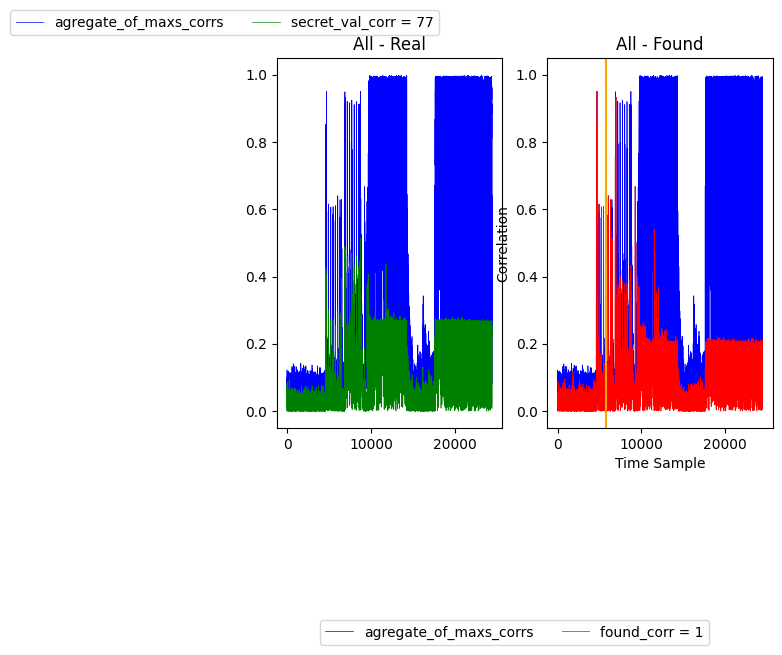

Hello 76
In range 5798 - 24429
 Found the soonest secret value is 29, at the time sample 6898, with correlation secret_corr = 0.949


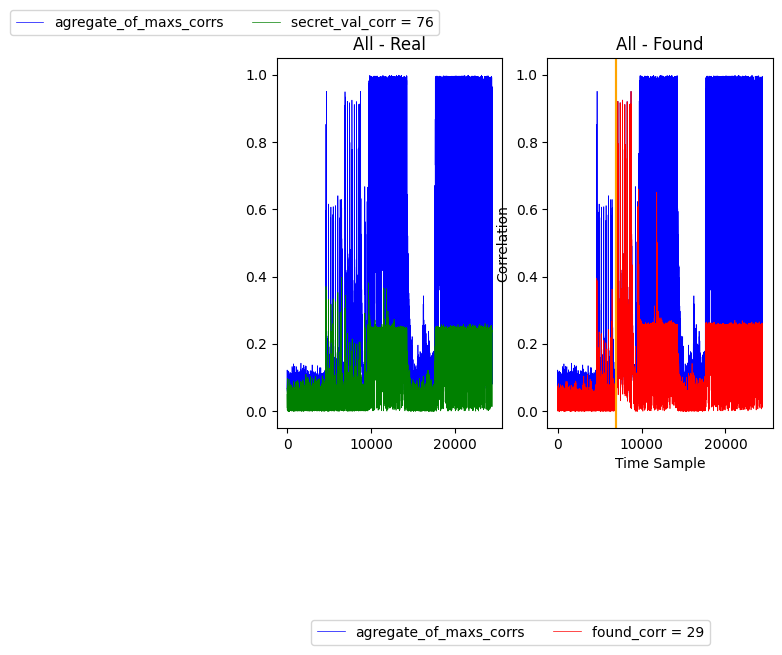

Hello 52
In range 6928 - 24429
 Found the soonest secret value is 1, at the time sample 6958, with correlation secret_corr = 0.905


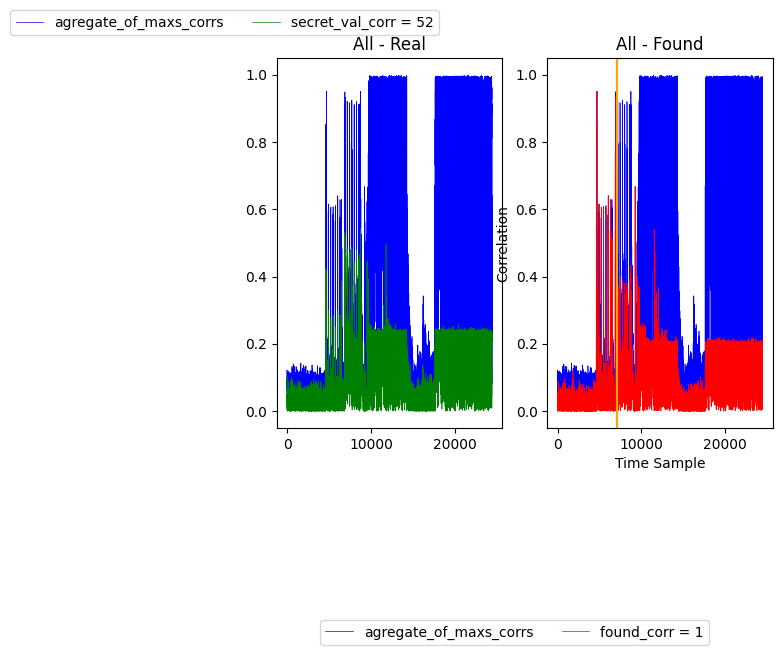

Hello 20
In range 7066 - 24429
 Found the soonest secret value is 29, at the time sample 7174, with correlation secret_corr = 0.921


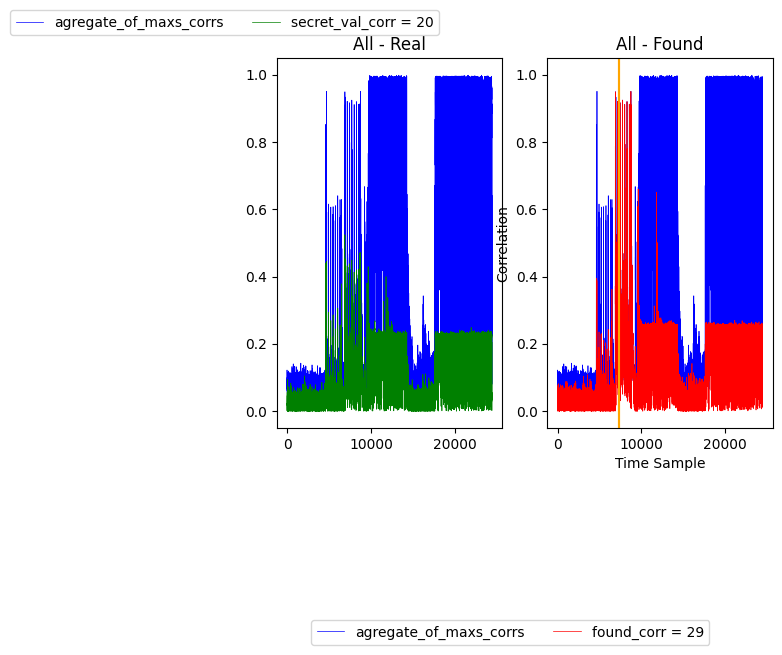

Hello 228
In range 7310 - 24429
 Found the soonest secret value is 29, at the time sample 7446, with correlation secret_corr = 0.917


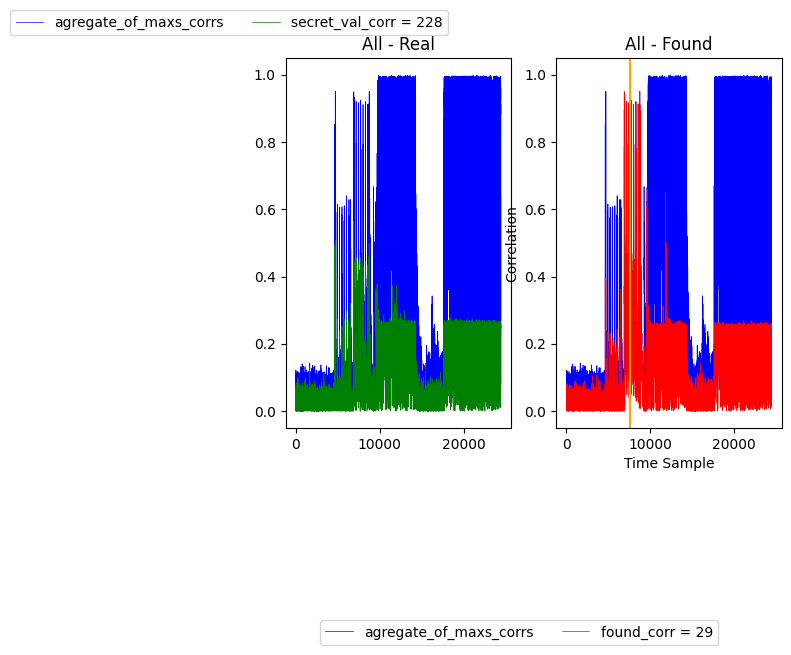

Hello 240
In range 7584 - 24429
 Found the soonest secret value is 29, at the time sample 7722, with correlation secret_corr = 0.924


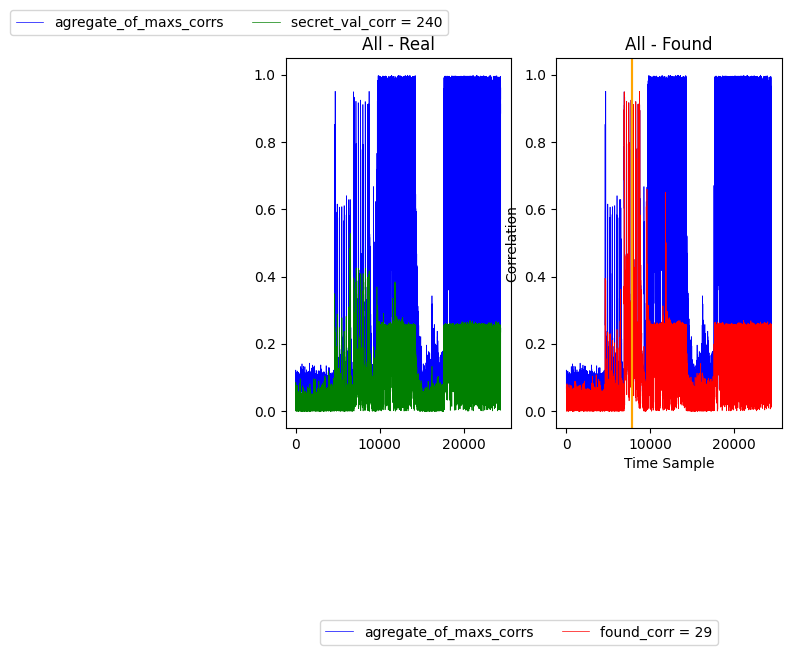

Hello 0
In range 7862 - 24429
 Found the soonest secret value is 29, at the time sample 8002, with correlation secret_corr = 0.911


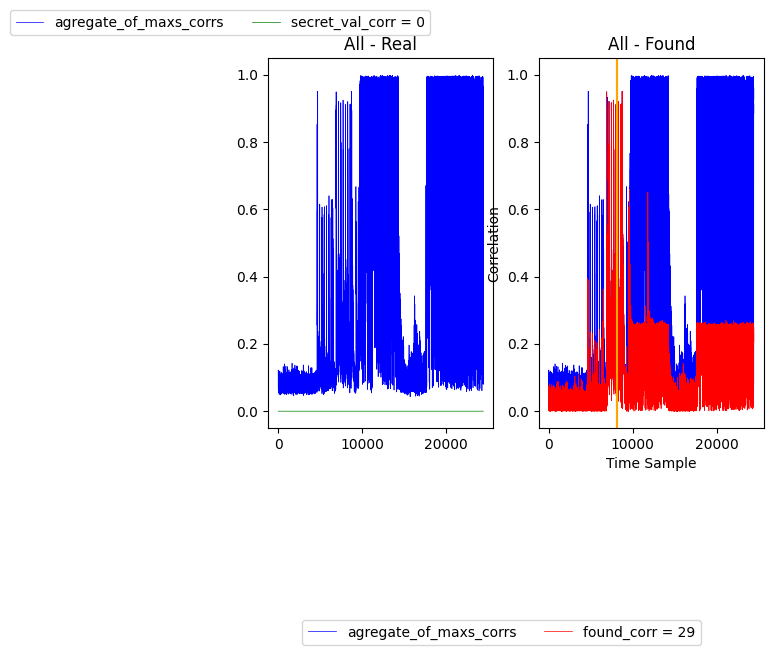

Hello 116
In range 8140 - 24429
 Found the soonest secret value is 29, at the time sample 8278, with correlation secret_corr = 0.920


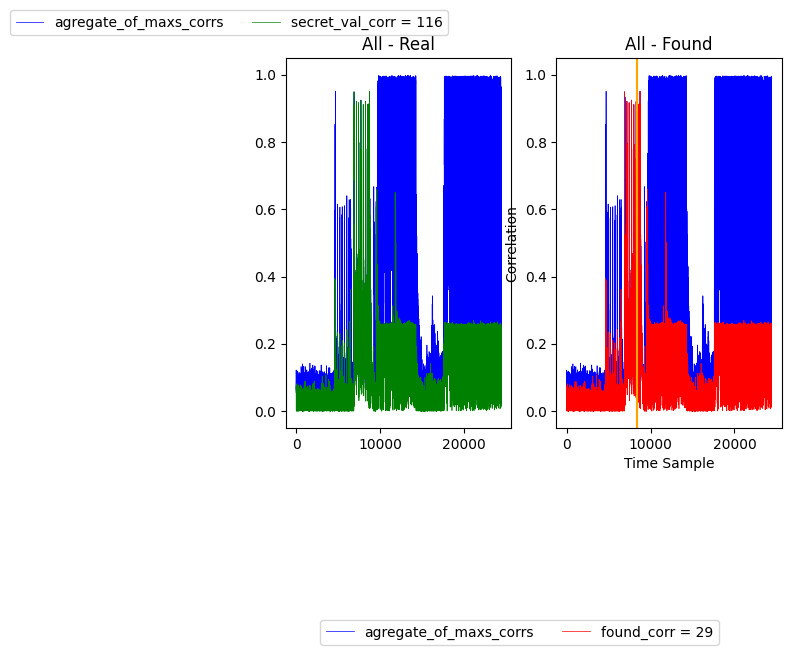

Hello 115
In range 8414 - 24429
 Found the soonest secret value is 29, at the time sample 8550, with correlation secret_corr = 0.912


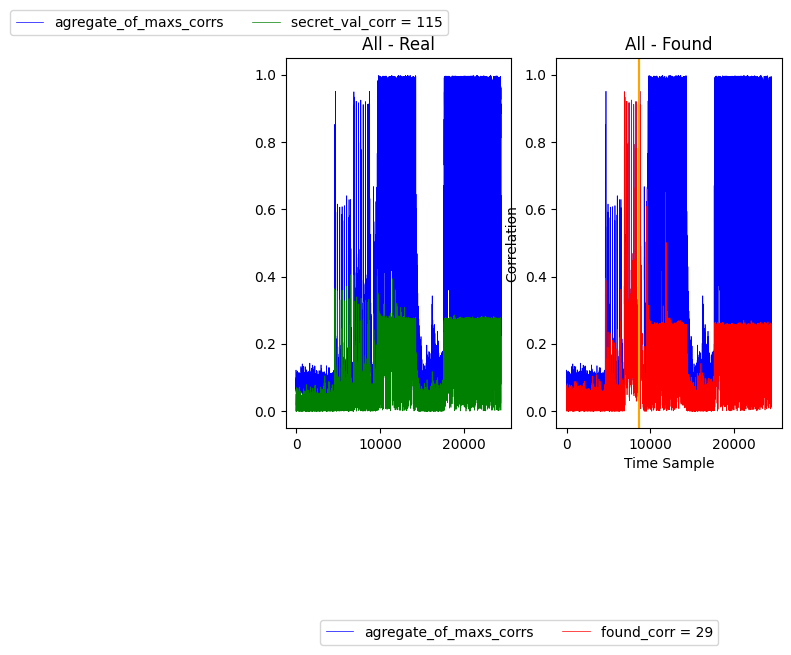

Hello 205
In range 8608 - 24429
 Found the soonest secret value is 29, at the time sample 8666, with correlation secret_corr = 0.913


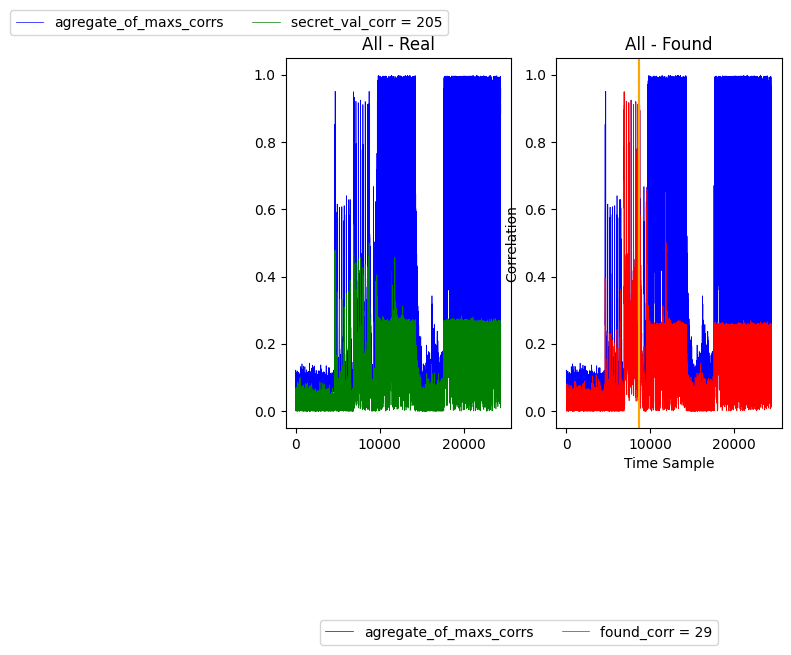

Hello 58
In range 8703 - 24429
 Found the soonest secret value is 29, at the time sample 8741, with correlation secret_corr = 0.950


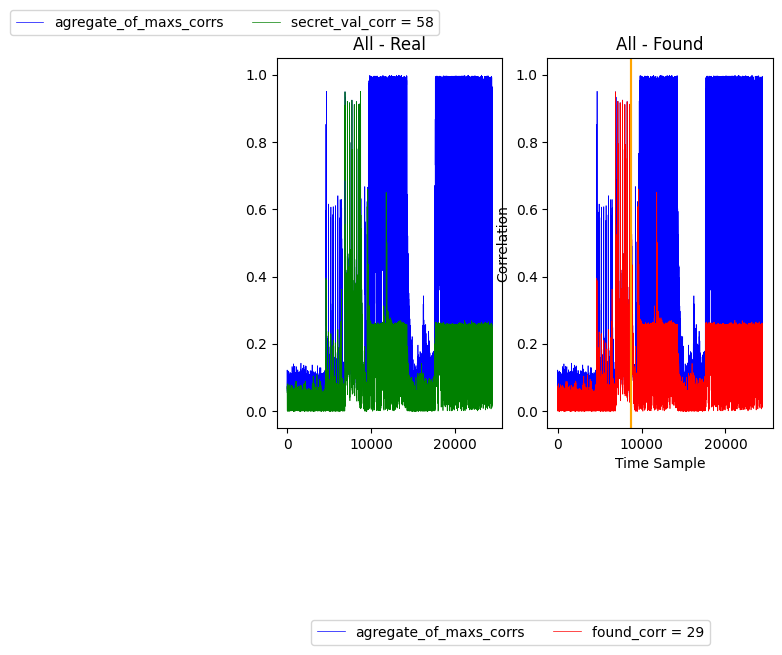

In [21]:
corr_map = abs(np.array(corr_HW32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW32_{firmwareName}')

##### CPA, weight extraction - HW8

Hello 255
Peak range: 0.3
24429
 Index of global max: 4697 and global_max_val: 0.9506719086894565


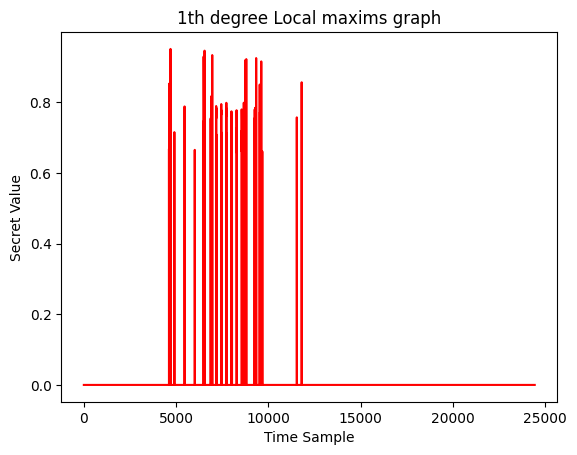

Number of uniques: 13
Number of local maxims: 169
Uniquess: [255, 2, 1, 128, 192, 224, 29, 58, 116, 252, 155, 196, 250]
Local maxims: [255, 2, 1, 1, 1, 1, 1, 1, 1, 128, 128, 192, 192, 192, 224, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 58, 29, 29, 29, 29, 29, 29, 1, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 116, 116, 116, 116, 116, 116, 29, 29, 29, 116, 116, 116, 116, 1, 252, 252, 252, 255, 255, 255, 255, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 255, 255, 255, 255, 116, 116, 116, 116, 116, 116, 116, 116, 196, 196, 250, 116, 116, 116, 250, 255, 116, 116, 116, 116]


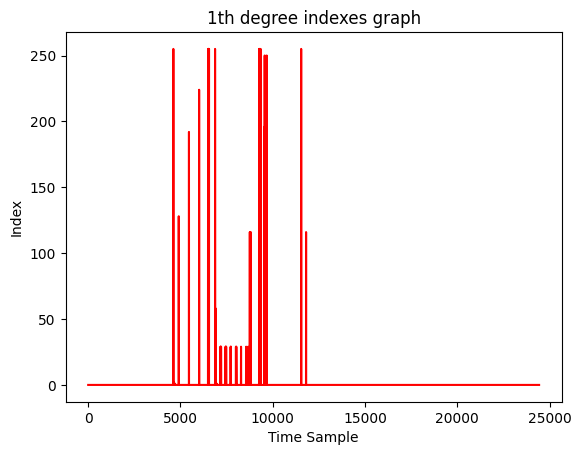

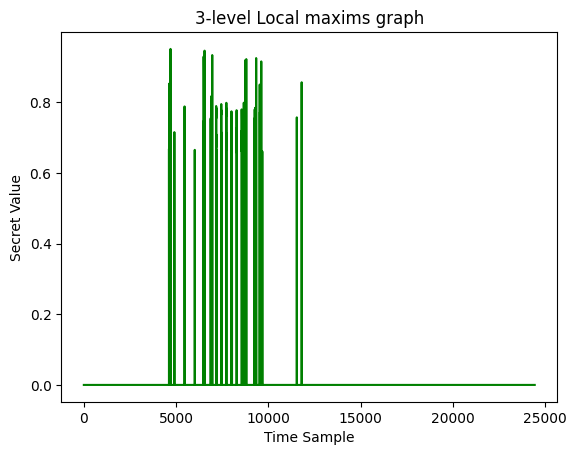

Number of uniques: 13
Number of local maxims: 219
Uniquess: [255, 2, 1, 128, 192, 224, 29, 58, 116, 252, 155, 196, 250]
Local maxims: [255, 2, 1, 1, 1, 1, 1, 1, 1, 1, 128, 128, 192, 192, 192, 224, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 1, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 58, 29, 29, 29, 29, 29, 29, 29, 1, 1, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 116, 116, 116, 116, 116, 116, 116, 116, 29, 29, 29, 29, 29, 116, 116, 116, 116, 1, 252, 252, 252, 252, 255, 255, 255, 255, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 255, 255, 255, 255, 116, 116, 116, 116, 116, 1

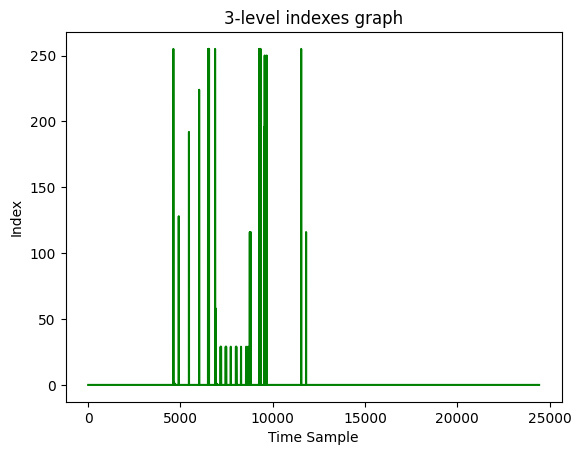

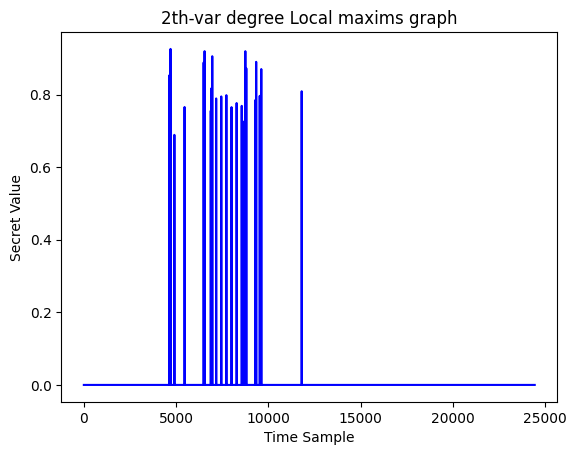

Number of uniques: 8
Number of local maxims: 25
Uniquess: [1, 128, 192, 255, 29, 116, 155, 196]
Local maxims: [1, 1, 128, 192, 255, 255, 255, 1, 29, 1, 29, 29, 29, 29, 29, 29, 29, 116, 116, 155, 255, 116, 196, 116, 116]


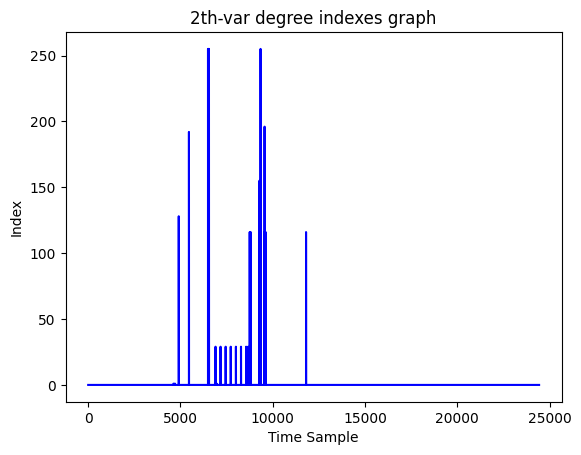

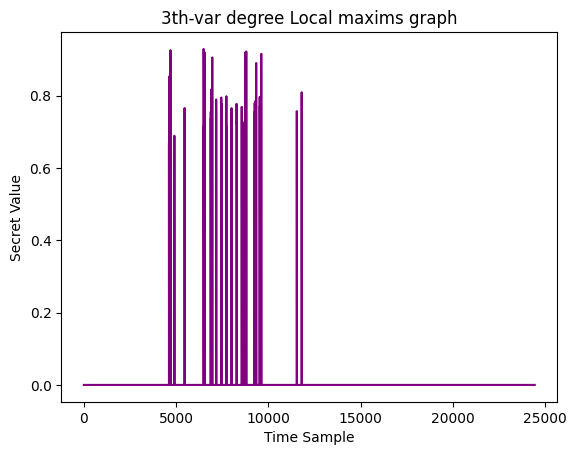

Number of uniques: 10
Number of local maxims: 112
Uniquess: [255, 1, 128, 192, 29, 58, 116, 252, 155, 196]
Local maxims: [255, 1, 1, 1, 1, 1, 1, 128, 192, 192, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 1, 29, 29, 29, 29, 58, 29, 29, 29, 29, 29, 1, 1, 1, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 116, 116, 116, 116, 29, 29, 29, 116, 116, 116, 252, 252, 252, 255, 255, 255, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 255, 255, 255, 116, 116, 116, 116, 116, 116, 196, 116, 116, 116, 255, 116, 116, 116]


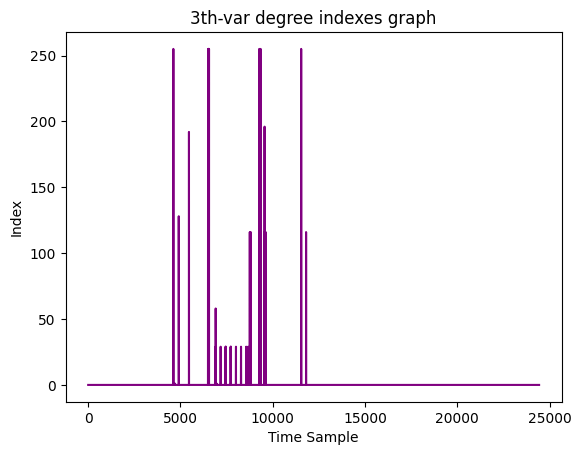

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4625, with correlation secret_corr = 0.852


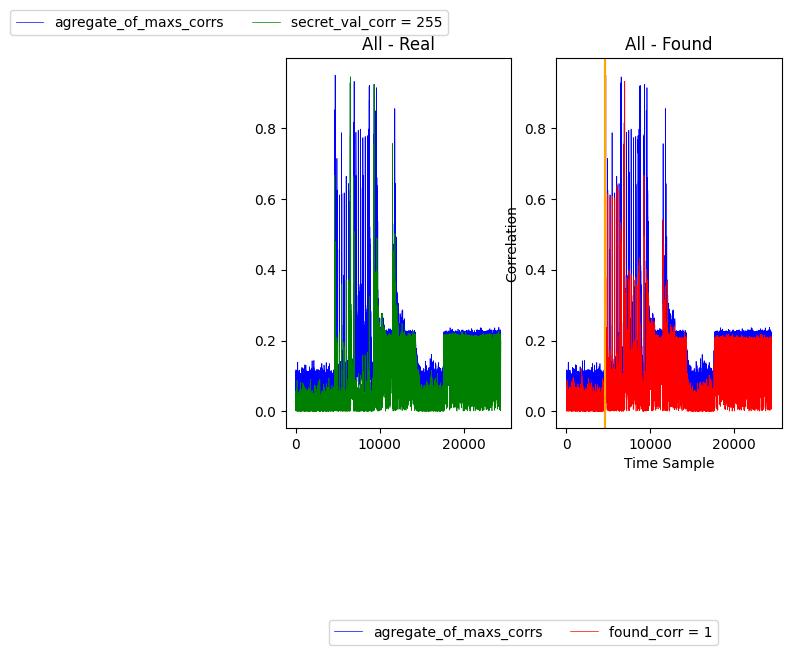

Hello 77
In range 4662 - 24429
 Found the soonest secret value is 1, at the time sample 4698, with correlation secret_corr = 0.926


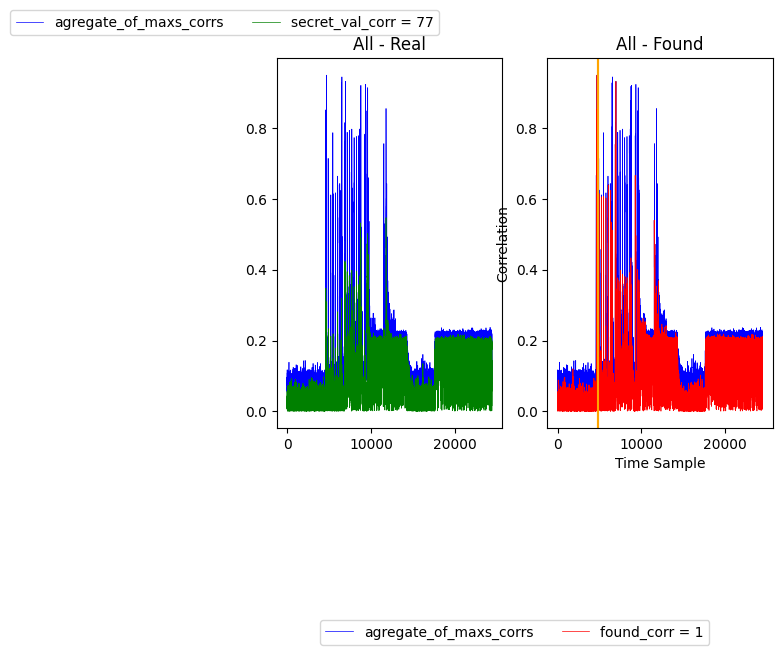

Hello 76
In range 4802 - 24429
 Found the soonest secret value is 128, at the time sample 4906, with correlation secret_corr = 0.689


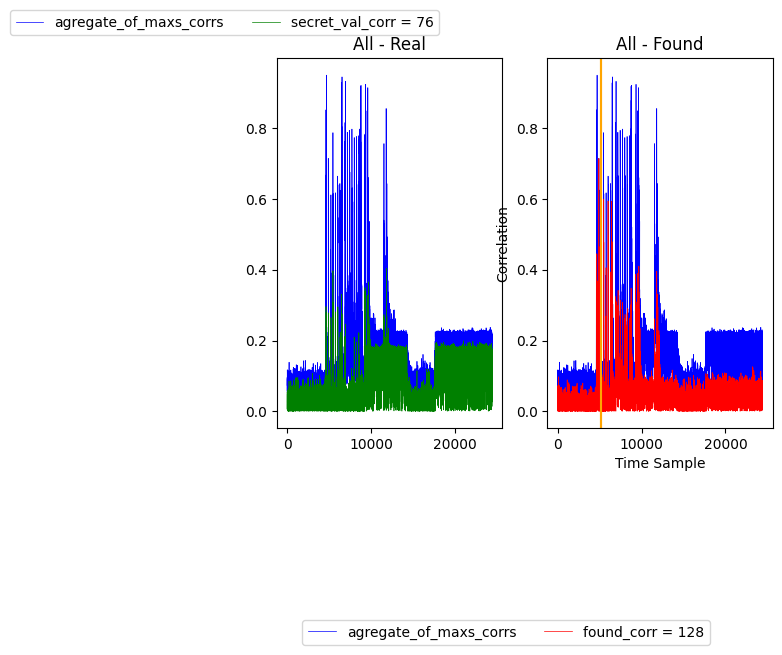

Hello 52
In range 5182 - 24429
 Found the soonest secret value is 192, at the time sample 5458, with correlation secret_corr = 0.766


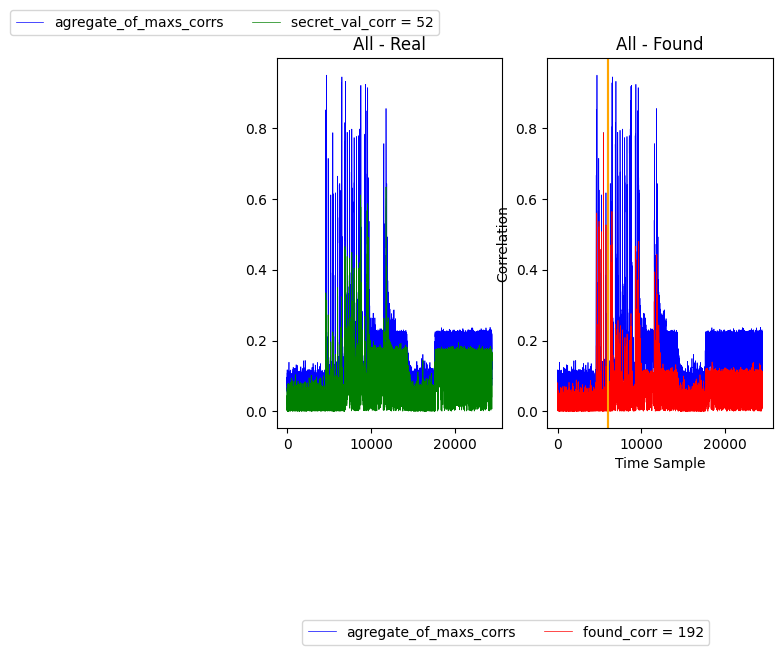

Hello 20
In range 5975 - 24429
 Found the soonest secret value is 255, at the time sample 6491, with correlation secret_corr = 0.888


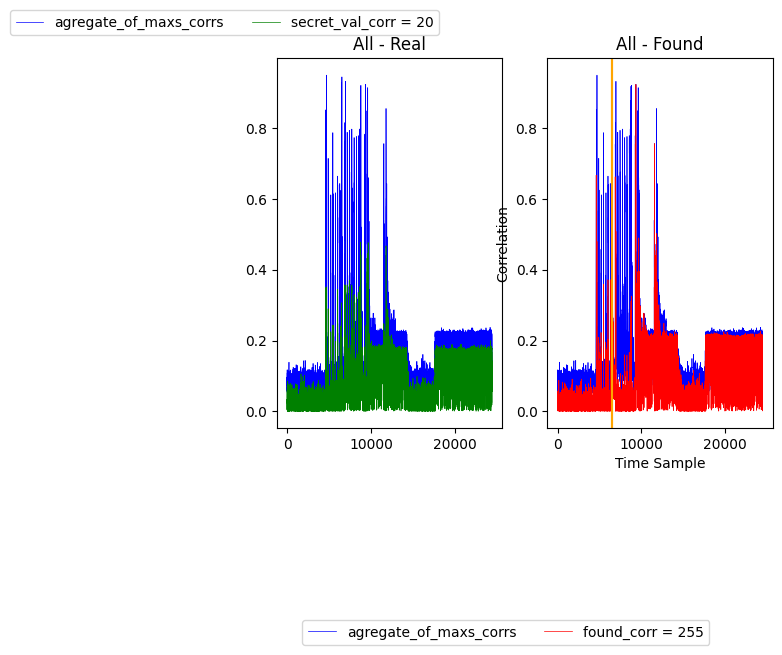

Hello 228
In range 6502 - 24429
 Found the soonest secret value is 255, at the time sample 6514, with correlation secret_corr = 0.653


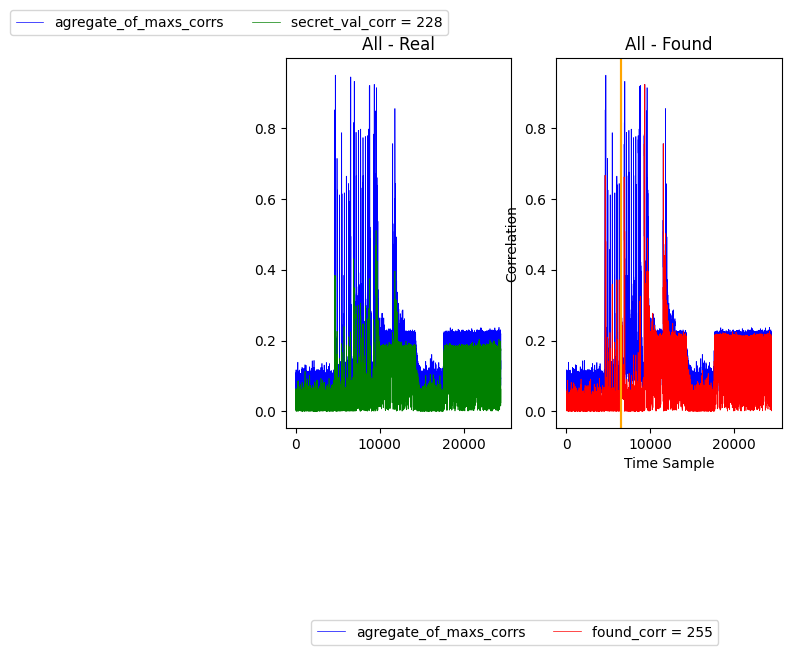

Hello 240
In range 6528 - 24429
 Found the soonest secret value is 255, at the time sample 6542, with correlation secret_corr = 0.919


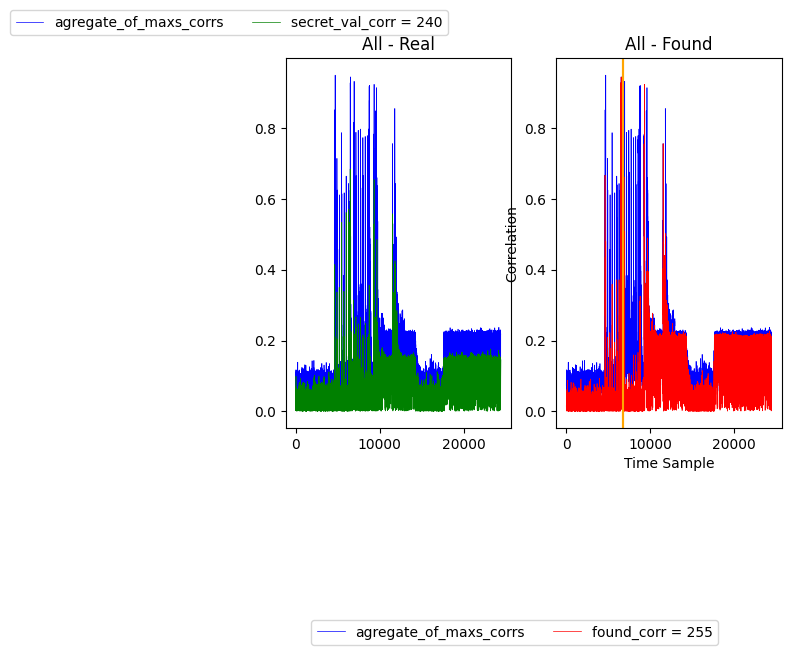

Hello 0
In range 6709 - 24429
 Found the soonest secret value is 1, at the time sample 6877, with correlation secret_corr = 0.755


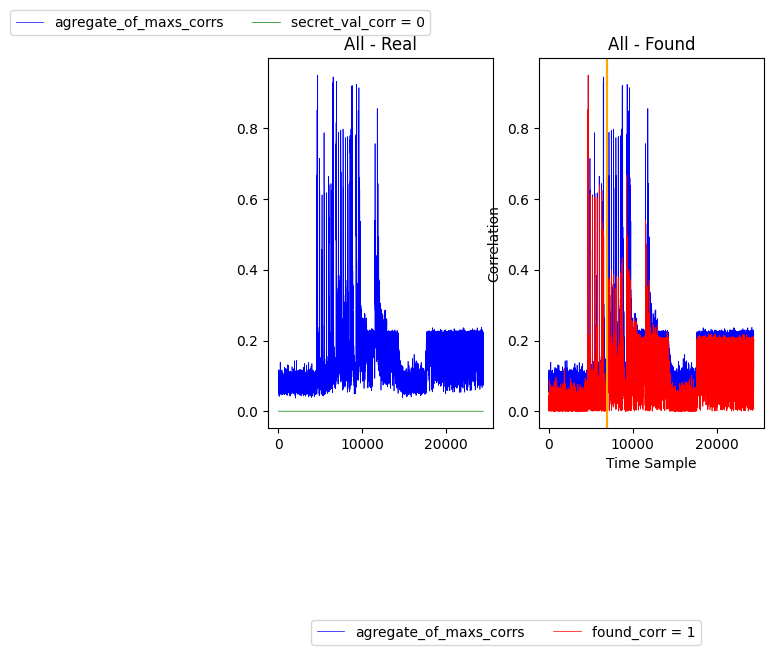

Hello 116
In range 6888 - 24429
 Found the soonest secret value is 29, at the time sample 6898, with correlation secret_corr = 0.817


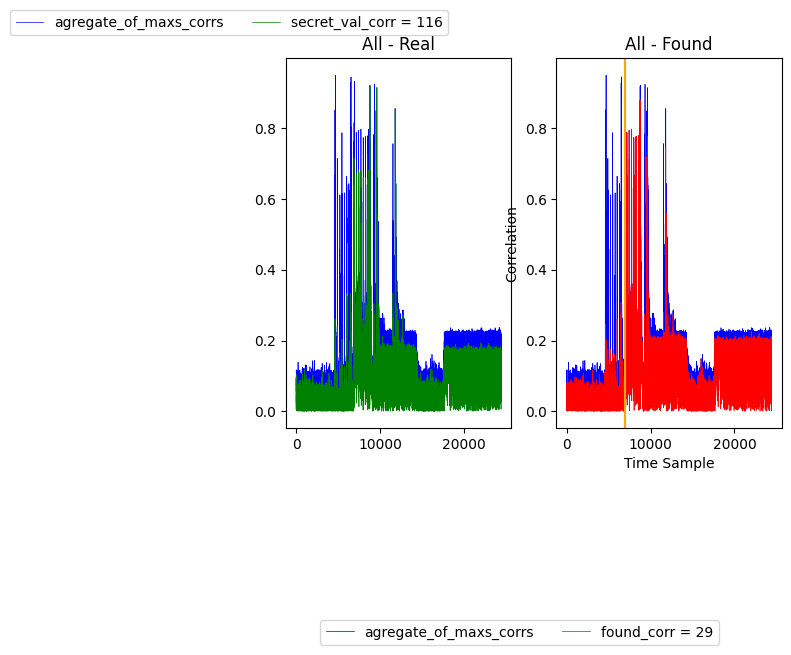

Hello 115
In range 6928 - 24429
 Found the soonest secret value is 1, at the time sample 6958, with correlation secret_corr = 0.905


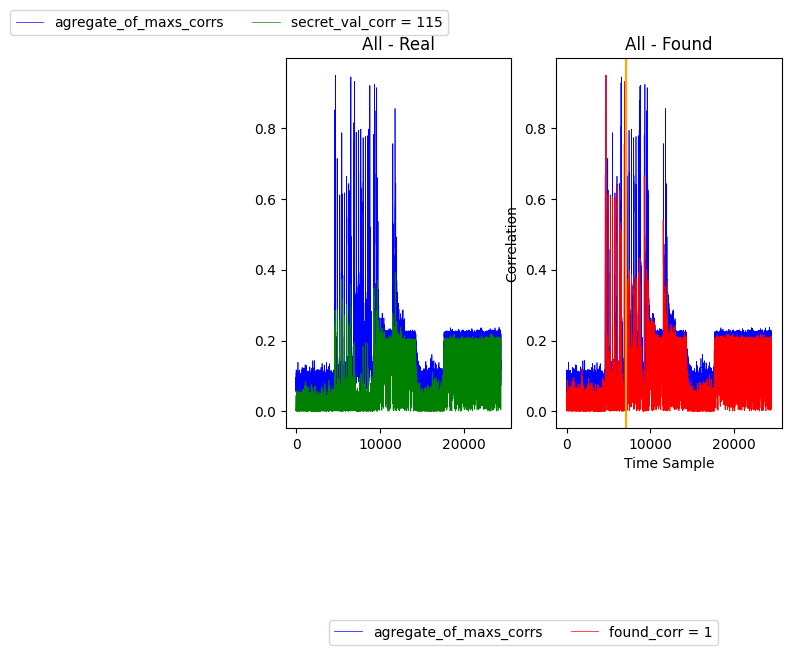

Hello 205
In range 7064 - 24429
 Found the soonest secret value is 29, at the time sample 7170, with correlation secret_corr = 0.789


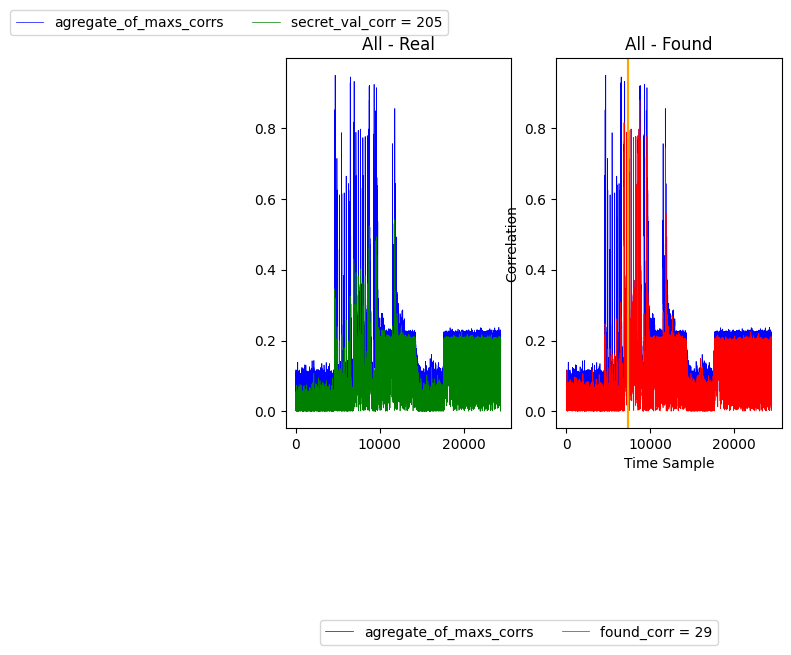

Hello 58
In range 7308 - 24429
 Found the soonest secret value is 29, at the time sample 7446, with correlation secret_corr = 0.795


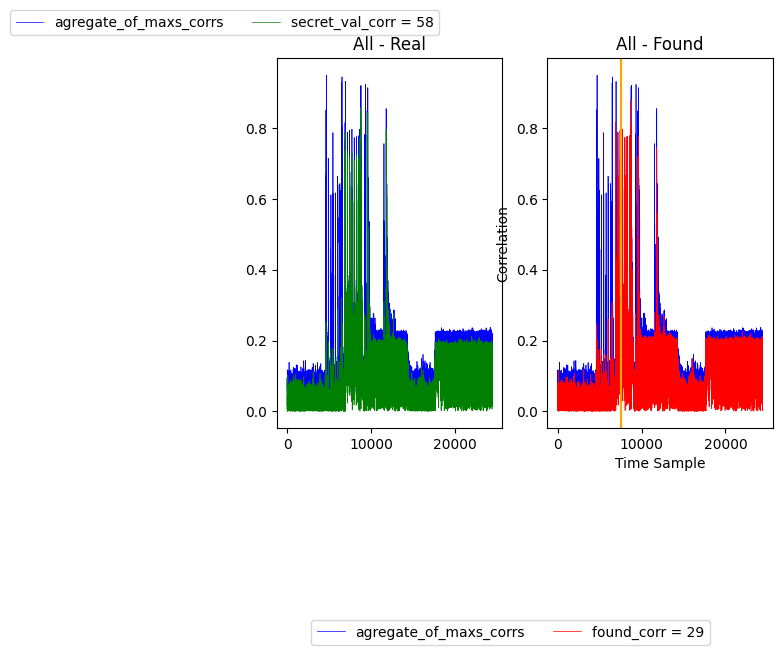

In [22]:
corr_map = abs(np.array(corr_HW8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW8_{firmwareName}')

### Current Overview and findings: 